# Problem Statment

There are many seasons when sales are significantly higher or lower than average. If the company is unaware of these fluctuations, it could lose a substantial amount of money. Predicting future sales is crucial for a company. Sales forecasting helps the company manage inventory, calculate revenue, and make informed decisions about new investments. Additionally, meeting predetermined targets from the start of the season can positively impact stock prices and investors' perceptions. Conversely, failing to meet projected targets could significantly damage stock prices, which would be especially problematic for a large company like Walmart

Aim:
My aim in this project is to build a model that can forecast sales of the stores based on patterns. With this model, authorities can make crucial business decisions, maximize revenue profits and improve sales in low performing departments.

# Data Exploration

In [42]:
# <== Importing Necessary Libraries ==>
import os
import math
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# <== Mouting Google drive ==>
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# loading all datasets
df_features = pd.read_csv('/content/drive/My Drive/Datasets/Walmart-Sales/Sales-Prediction/features.csv')
df_store = pd.read_csv('/content/drive/My Drive/Datasets/Walmart-Sales/Sales-Prediction/stores.csv')
df_test = pd.read_csv('/content/drive/My Drive/Datasets/Walmart-Sales/Sales-Prediction/test.csv')
df_train = pd.read_csv('/content/drive/My Drive/Datasets/Walmart-Sales/Sales-Prediction/train.csv')

In [27]:
pd.options.display.max_rows=100
pd.pandas.set_option('display.max_columns', None)

### Dataset Description

1. **Features.csv**: Additional data related to the store, department, and regional activity for the given dates.
2. **train.csv**: This is the historical training data, which covers 2010–02–05 to 2012-08-17.
3. **test.csv**: Similar to train.csv, we've to predict weekly sales.
4. **stores.csv**: Contains anonymized information about the 45 stores, indicating the type and size of the store.

In [28]:
# lowercase all the column names and replace spaces with _
df_train.columns = df_train.columns.str.lower().str.replace(' ', '_')
df_store.columns = df_store.columns.str.lower().str.replace(' ', '_')
df_features.columns = df_features.columns.str.lower().str.replace(' ', '_')

### Exploring - Features.csv

In [29]:
print("Shape of dataset (rows x columns): ", df_features.shape)

Shape of dataset (rows x columns):  (8190, 12)


In [30]:
df_features.head(10)

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday
0,17,13-08-2010,65.17,2.837,NaN,NaN,NaN,NaN,NaN,126.064,6.70,False
1,4,13-08-2010,78.08,2.698,NaN,NaN,NaN,NaN,NaN,126.064,7.37,False
2,44,13-08-2010,74.93,2.837,NaN,NaN,NaN,NaN,NaN,126.064,7.80,False
3,13,13-08-2010,74.93,2.837,NaN,NaN,NaN,NaN,NaN,126.064,7.95,False
4,10,13-08-2010,88.37,3.049,NaN,NaN,NaN,NaN,NaN,126.064,9.20,False
5,42,13-08-2010,88.37,3.049,NaN,NaN,NaN,NaN,NaN,126.064,9.20,False
6,33,13-08-2010,95.57,3.049,NaN,NaN,NaN,NaN,NaN,126.064,9.50,False
7,34,13-08-2010,76.72,2.698,NaN,NaN,NaN,NaN,NaN,126.064,9.82,False
8,12,13-08-2010,87.01,3.159,NaN,NaN,NaN,NaN,NaN,126.064,14.18,False
9,28,13-08-2010,87.01,3.159,NaN,NaN,NaN,NaN,NaN,126.064,14.18,False


In [31]:
df_features.head(-10)

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday
0,17,13-08-2010,65.17,2.837,NaN,NaN,NaN,NaN,NaN,126.064,6.70,False
1,4,13-08-2010,78.08,2.698,NaN,NaN,NaN,NaN,NaN,126.064,7.37,False
2,44,13-08-2010,74.93,2.837,NaN,NaN,NaN,NaN,NaN,126.064,7.80,False
3,13,13-08-2010,74.93,2.837,NaN,NaN,NaN,NaN,NaN,126.064,7.95,False
4,10,13-08-2010,88.37,3.049,NaN,NaN,NaN,NaN,NaN,126.064,9.20,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8175,39,26-07-2013,83.84,3.620,12682.46,1094.97,21.85,170.61,2779.41,NaN,NaN,False
8176,5,26-07-2013,84.16,3.620,131.42,35.39,0.09,NaN,948.51,NaN,NaN,False
8177,6,26-07-2013,84.42,3.620,543.69,798.02,16.05,70.40,2648.37,NaN,NaN,False
8178,21,26-07-2013,85.00,3.620,1025.38,928.07,4.00,97.85,2549.08,NaN,NaN,False


In [32]:
# Display column names
print(df_features.columns)

Index(['store', 'date', 'temperature', 'fuel_price', 'markdown1', 'markdown2',
       'markdown3', 'markdown4', 'markdown5', 'cpi', 'unemployment',
       'isholiday'],
      dtype='object')


### Column wise description

- Store: Denotes the Store Number
- Date: Dates (Data) from 2010 - 2012
- Temperature: Temperature in Fahrenheit
- Fuel Price: Price of Fuel that day
- Markdown1, Markdown2, Markdown3, Markdown4: Anonymized data related to promotional markdowns at Walmart
- CPI: The consumer price index. It measures the monthly changes in prices paid by US consumers
- Unemployement: Rate of Unemployment
- IsHoliday: Is that particular day holiday or working day?

In [33]:
# Display summary information about the dataset
print(df_features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         8190 non-null   int64  
 1   date          8190 non-null   object 
 2   temperature   8190 non-null   float64
 3   fuel_price    8190 non-null   float64
 4   markdown1     4032 non-null   float64
 5   markdown2     2921 non-null   float64
 6   markdown3     3613 non-null   float64
 7   markdown4     3464 non-null   float64
 8   markdown5     4050 non-null   float64
 9   cpi           7605 non-null   float64
 10  unemployment  7605 non-null   float64
 11  isholiday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None


In [34]:
# Display statistical summary of the dataset
print(df_features.describe())

             store  temperature   fuel_price      markdown1      markdown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           markdown3     markdown4      markdown5          cpi  unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.827231  
std     11276.462208   6792.329861   13086.690278    39.7383

In [35]:
# Check for missing values
print(df_features.isnull().sum())

store              0
date               0
temperature        0
fuel_price         0
markdown1       4158
markdown2       5269
markdown3       4577
markdown4       4726
markdown5       4140
cpi              585
unemployment     585
isholiday          0
dtype: int64


In [36]:
# Number of unique values
df_features.nunique()

,0
store,45
date,182
temperature,4178
fuel_price,1011
markdown1,4023
markdown2,2715
markdown3,2885
markdown4,3405
markdown5,4045
cpi,2505


# Data Visualization

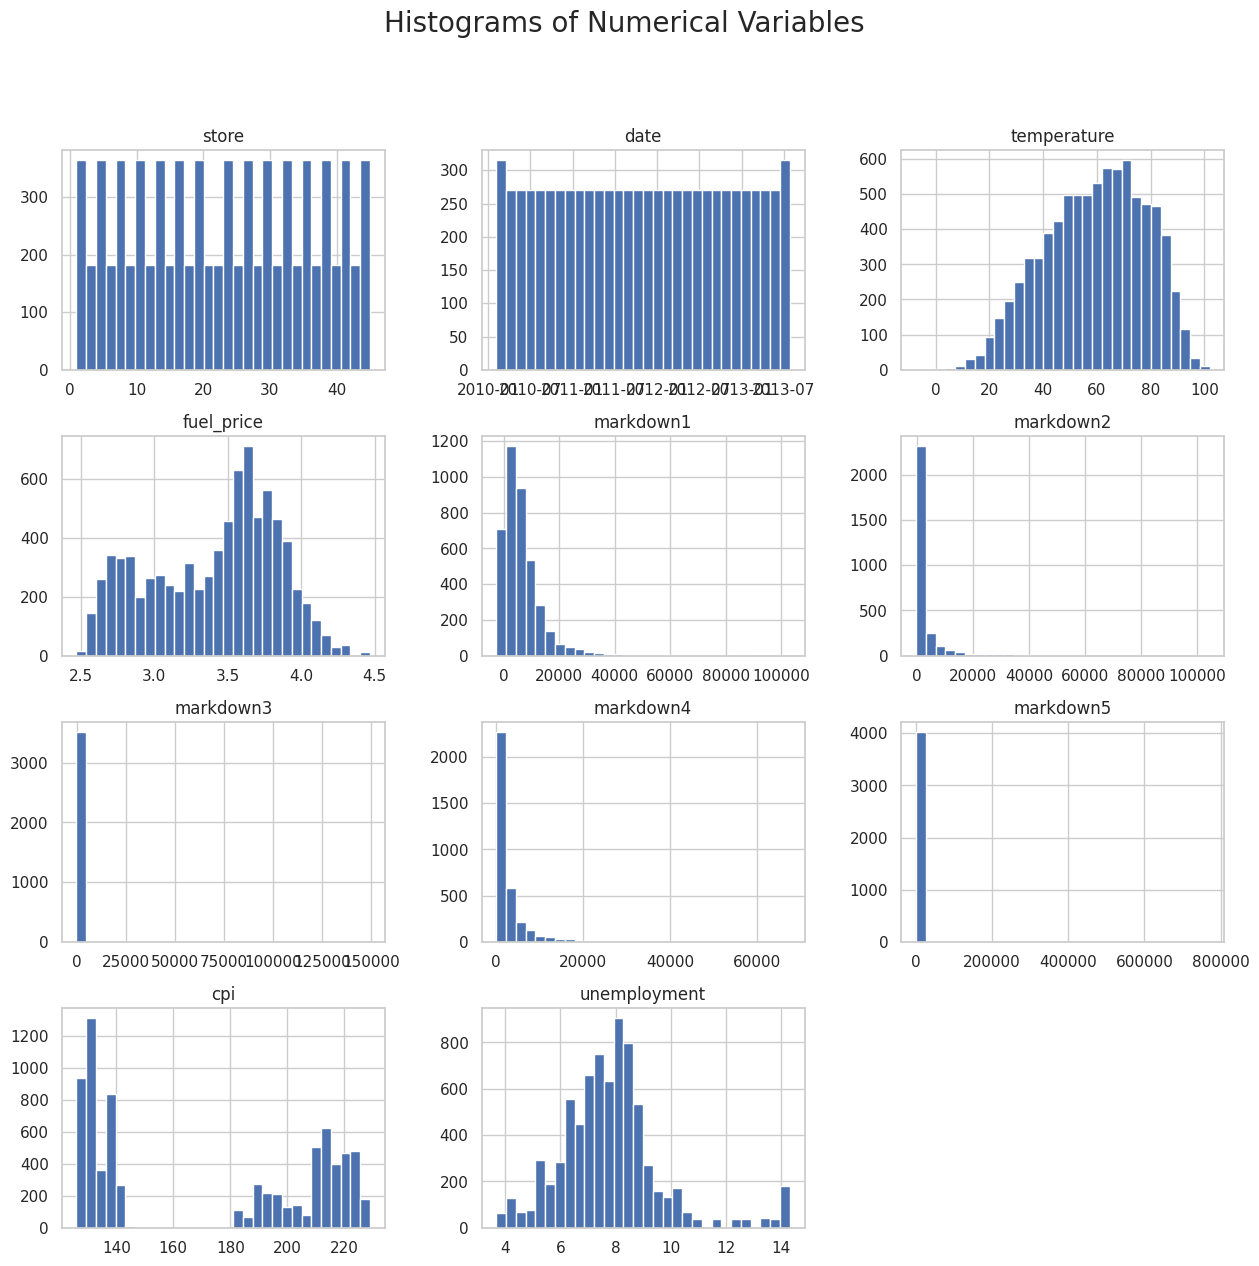

In [43]:
# Setting plot style
sns.set(style="whitegrid")

# Plot histograms for numerical variables
df_features.hist(bins=30, figsize=(15, 14))
plt.suptitle('Histograms of Numerical Variables', fontsize=20)
plt.show()

<Axes: >

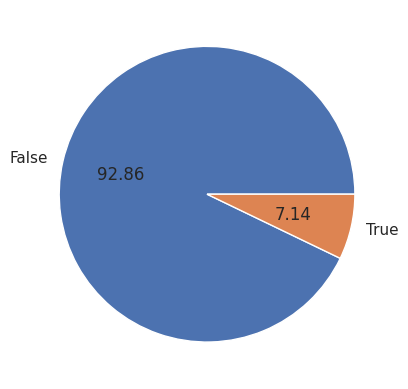

In [38]:
df_features.groupby('isholiday').size().plot(kind='pie', autopct='%.2f')
# False: is not a holiday, True: its a holiday

### Unemployment rate v/s time

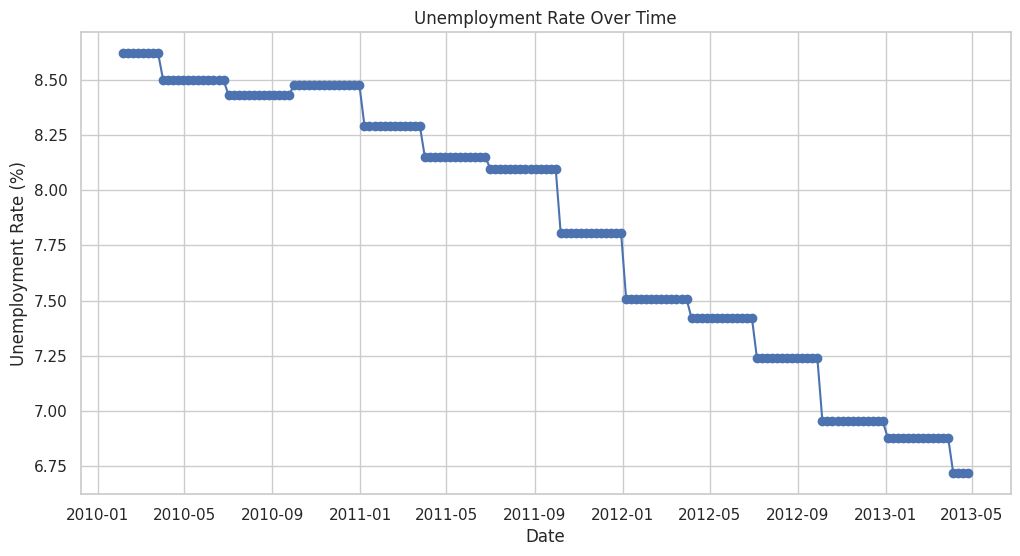

In [39]:
# Convert the 'Date' column to datetime format
df_features['date'] = pd.to_datetime(df_features['date'], format='%d-%m-%Y')

# Group by 'Date' and calculate the average unemployment rate
df_grouped = df_features.groupby('date')['unemployment'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['date'], df_grouped['unemployment'], marker='o', linestyle='-')

# Adding titles and labels
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')

# Show plot
plt.grid(True)
plt.show()

### CPI Index v/s time

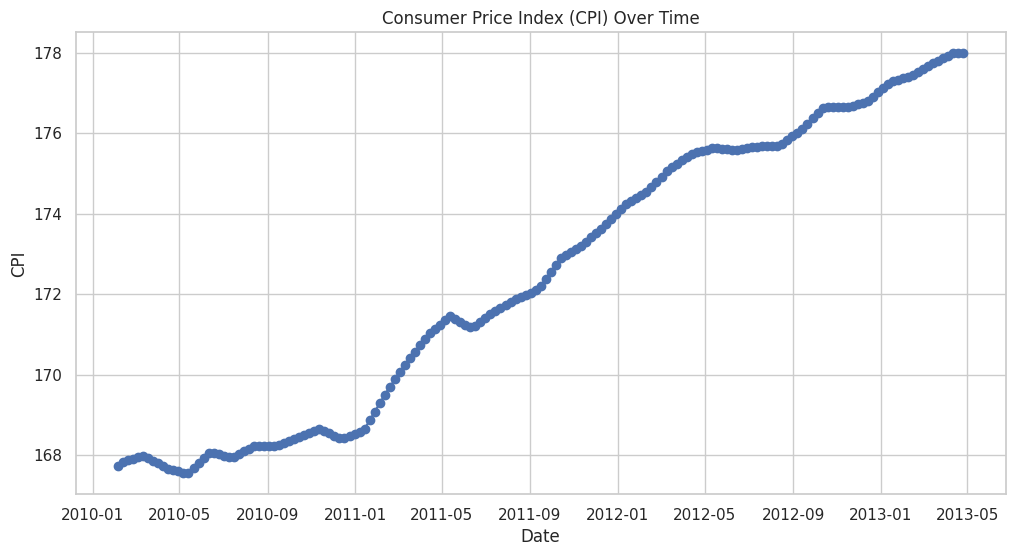

In [40]:
# Group by 'Date' and calculate the average CPI
df_grouped_cpi = df_features.groupby('date')['cpi'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df_grouped_cpi['date'], df_grouped_cpi['cpi'], marker='o', linestyle='-')

# Adding titles and labels
plt.title('Consumer Price Index (CPI) Over Time')
plt.xlabel('Date')
plt.ylabel('CPI')

# Show plot
plt.grid(True)
plt.show()

### Fuel Price v/s time

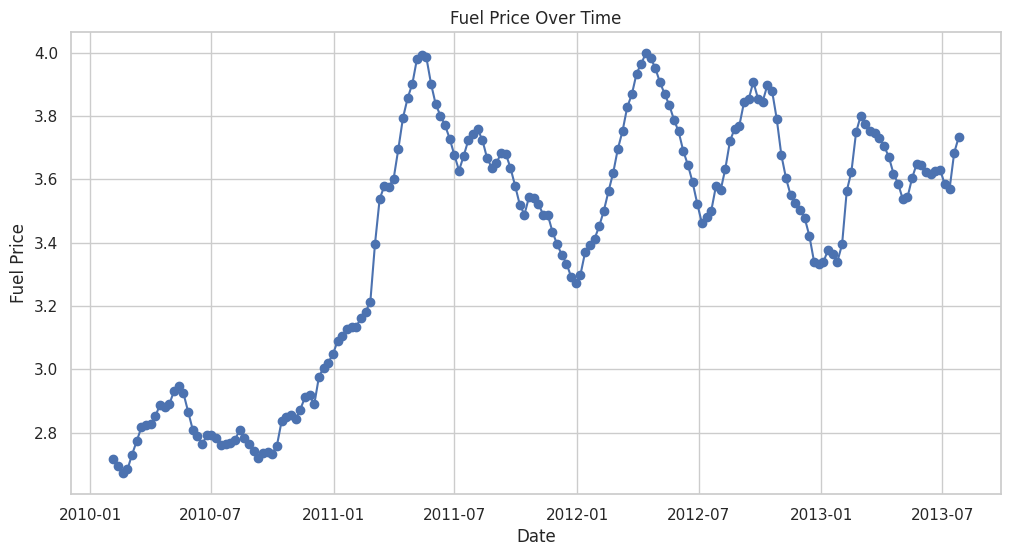

In [41]:
# Group by 'Date' and calculate the average Fuel Price
df_grouped_fuel_price = df_features.groupby('date')['fuel_price'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df_grouped_fuel_price['date'], df_grouped_fuel_price['fuel_price'], marker='o', linestyle='-')

# Adding titles and labels
plt.title('Fuel Price Over Time')
plt.xlabel('Date')
plt.ylabel('Fuel Price')

# Show plot
plt.grid(True)
plt.show()

### Normalized comparision of Unemployment rate v/s CPI v/s Fuel Price

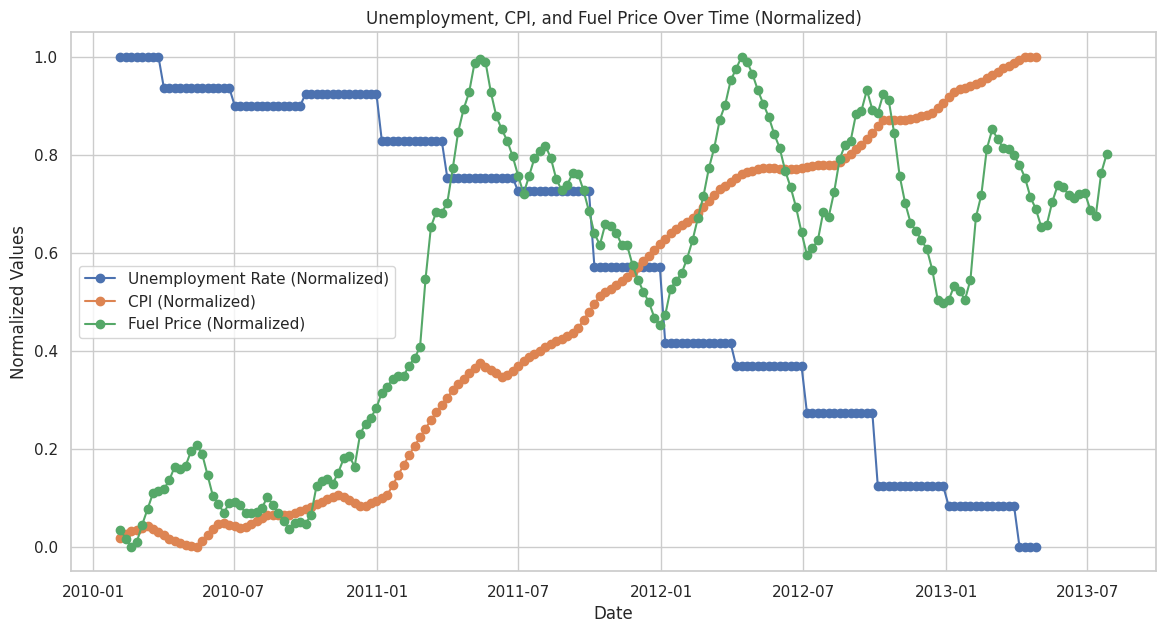

In [ ]:
# Group by 'Date' and calculate the average for each metric
df_grouped = df_features.groupby('date').mean().reset_index()

# Normalize the data
df_grouped['Unemployment_norm'] = (df_grouped['unemployment'] - df_grouped['unemployment'].min()) / (df_grouped['unemployment'].max() - df_grouped['unemployment'].min())
df_grouped['CPI_norm'] = (df_grouped['cpi'] - df_grouped['cpi'].min()) / (df_grouped['cpi'].max() - df_grouped['cpi'].min())
df_grouped['Fuel_Price_norm'] = (df_grouped['fuel_price'] - df_grouped['fuel_price'].min()) / (df_grouped['fuel_price'].max() - df_grouped['fuel_price'].min())

# Plotting the data
plt.figure(figsize=(14, 7))

# Plot each normalized metric
plt.plot(df_grouped['date'], df_grouped['Unemployment_norm'], marker='o', linestyle='-', label='Unemployment Rate (Normalized)')
plt.plot(df_grouped['date'], df_grouped['CPI_norm'], marker='o', linestyle='-', label='CPI (Normalized)')
plt.plot(df_grouped['date'], df_grouped['Fuel_Price_norm'], marker='o', linestyle='-', label='Fuel Price (Normalized)')

# Adding titles and labels
plt.title('Unemployment, CPI, and Fuel Price Over Time (Normalized)')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

### Comparing Unemployment v/s CPI v/s Fuel Price, one frame, multiple Y-Axis

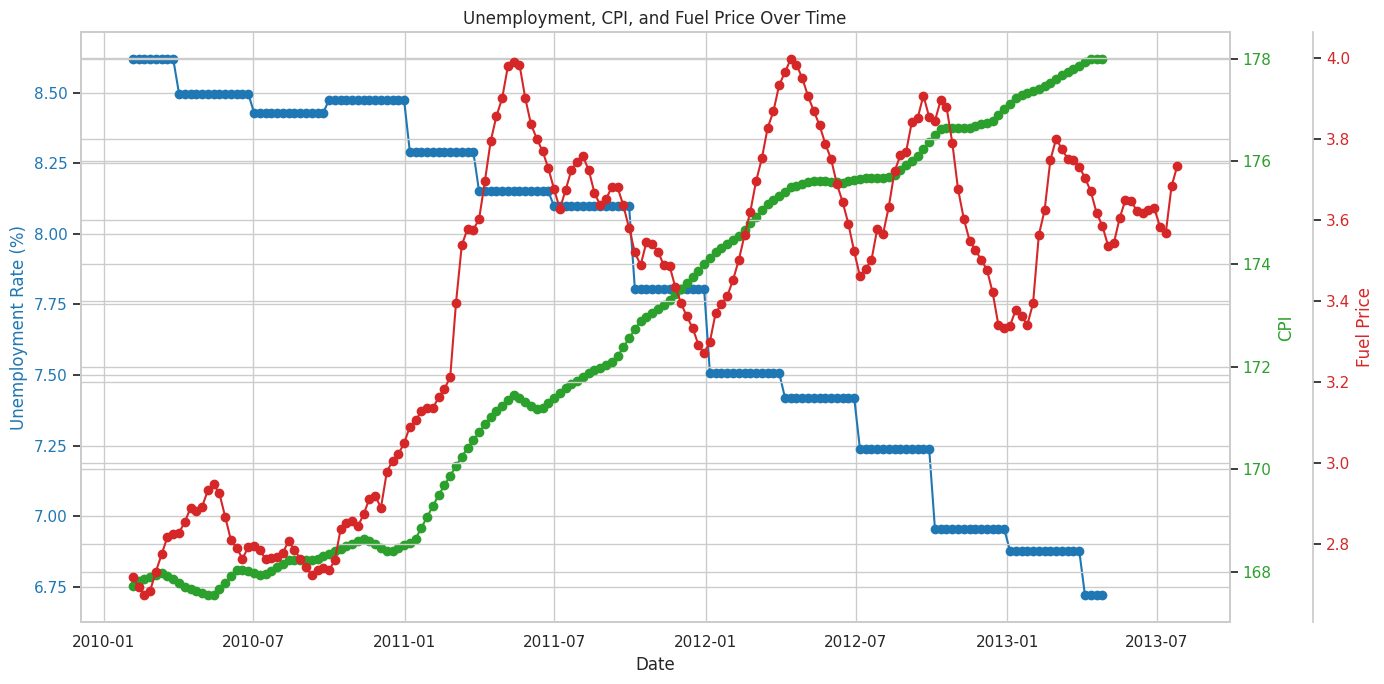

In [ ]:
# Group by 'Date' and calculate the average for each metric
df_grouped = df_features.groupby('date').mean().reset_index()

# Plotting the data
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting Unemployment on primary y-axis
ax1.plot(df_grouped['date'], df_grouped['unemployment'], color='tab:blue', marker='o', linestyle='-', label='Unemployment Rate (%)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Unemployment Rate (%)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis for CPI
ax2 = ax1.twinx()
ax2.plot(df_grouped['date'], df_grouped['cpi'], color='tab:green', marker='o', linestyle='-', label='CPI')
ax2.set_ylabel('CPI', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Creating a third y-axis for Fuel Price
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(df_grouped['date'], df_grouped['fuel_price'], color='tab:red', marker='o', linestyle='-', label='Fuel Price')
ax3.set_ylabel('Fuel Price', color='tab:red')
ax3.tick_params(axis='y', labelcolor='tab:red')

# Adding titles
plt.title('Unemployment, CPI, and Fuel Price Over Time')

# Show plot
fig.tight_layout()
plt.show()

# Data Preprocessing

### Taking care of missing values

In [ ]:
# filling missing values
df_features['cpi'].fillna(df_features['cpi'].median(),inplace=True)
df_features['unemployment'].fillna(df_features['unemployment'].median(),inplace=True)

In [ ]:
for i in range(1, 6):
    df_features["markdown" + str(i)] = df_features["markdown" + str(i)].apply(lambda x: 0 if x < 0 else x)
    df_features["markdown" + str(i)].fillna(value=0, inplace=True)

In [ ]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         8190 non-null   int64         
 1   date          8190 non-null   datetime64[ns]
 2   temperature   8190 non-null   float64       
 3   fuel_price    8190 non-null   float64       
 4   markdown1     8190 non-null   float64       
 5   markdown2     8190 non-null   float64       
 6   markdown3     8190 non-null   float64       
 7   markdown4     8190 non-null   float64       
 8   markdown5     8190 non-null   float64       
 9   cpi           8190 non-null   float64       
 10  unemployment  8190 non-null   float64       
 11  isholiday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [ ]:
df_features.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday
0,17,2010-08-13,65.17,2.837,0.0,0.0,0.0,0.0,0.0,126.064,6.70,False
1,4,2010-08-13,78.08,2.698,0.0,0.0,0.0,0.0,0.0,126.064,7.37,False
2,44,2010-08-13,74.93,2.837,0.0,0.0,0.0,0.0,0.0,126.064,7.80,False
3,13,2010-08-13,74.93,2.837,0.0,0.0,0.0,0.0,0.0,126.064,7.95,False
4,10,2010-08-13,88.37,3.049,0.0,0.0,0.0,0.0,0.0,126.064,9.20,False


In [ ]:
df_train.shape, df_store.shape, df_features.shape

((421570, 5), (45, 3), (8190, 12))

### Merging DataFrames

Merging 3 dataframes:

1. `features.csv`: Description already provided above.

2. `train.csv`: This is the historical training data, which covers 2010–02–05 to 2012–11–01, with following fields:
    * `Store`: *The store number*
    * `Dept`: *The department number*
    * `Date`: *The week*
    * `Weekly_Sales`: *Sales for the given department in the given store*
    * `IsHoliday`: *Whether the week is a special holiday week*

3. `stores.csv`: This file contains anonymized information about the 45 stores, indicating the type and size of the store:
    * `Store`: *Stores numbered from 1 to 45*
    * `Type`: *Store type has been provided, there are 3 types — A, B and C*
    * `Size`: *Stores size has provided*

In [ ]:
train_df = pd.merge(df_train,df_store,on='store',how='left')

In [ ]:
train_df.head()

,store,dept,date,weekly_sales,isholiday,type,size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [ ]:
df_features.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday
0,17,2010-08-13,65.17,2.837,0.0,0.0,0.0,0.0,0.0,126.064,6.70,False
1,4,2010-08-13,78.08,2.698,0.0,0.0,0.0,0.0,0.0,126.064,7.37,False
2,44,2010-08-13,74.93,2.837,0.0,0.0,0.0,0.0,0.0,126.064,7.80,False
3,13,2010-08-13,74.93,2.837,0.0,0.0,0.0,0.0,0.0,126.064,7.95,False
4,10,2010-08-13,88.37,3.049,0.0,0.0,0.0,0.0,0.0,126.064,9.20,False


In [ ]:
print(df_features.columns)
print(df_train.columns)
print(df_store.columns)

Index(['store', 'date', 'temperature', 'fuel_price', 'markdown1', 'markdown2',
       'markdown3', 'markdown4', 'markdown5', 'cpi', 'unemployment',
       'isholiday'],
      dtype='object')
Index(['store', 'dept', 'date', 'weekly_sales', 'isholiday'], dtype='object')
Index(['store', 'type', 'size'], dtype='object')


### Ensuring Consistency in merged dataframe

In [45]:
# Convert store columns to string to ensure consistency
df_features['store'] = df_features['store'].astype(str)
df_train['store'] = df_train['store'].astype(str)
df_store['store'] = df_store['store'].astype(str)

# Convert date columns to datetime if they are not already
df_features['date'] = pd.to_datetime(df_features['date'])
df_train['date'] = pd.to_datetime(df_train['date'])

# Strip any leading/trailing spaces in the store columns
df_features['store'] = df_features['store'].str.strip()
df_train['store'] = df_train['store'].str.strip()
df_store['store'] = df_store['store'].str.strip()

In [46]:
# Merge df_features with df_train on 'store' and 'date'
merged_df = pd.merge(df_features, df_train, on=['store', 'date'], how='inner')

# Merge the result with df_stores on 'store' only
final_merged_df = pd.merge(merged_df, df_store, on='store', how='inner')

In [47]:
final_merged_df.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday_x,dept,weekly_sales,isholiday_y,type,size
0,17,2010-08-13,65.17,2.837,NaN,NaN,NaN,NaN,NaN,126.064,6.7,False,1,12906.97,False,B,93188
1,17,2010-08-13,65.17,2.837,NaN,NaN,NaN,NaN,NaN,126.064,6.7,False,2,36476.06,False,B,93188
2,17,2010-08-13,65.17,2.837,NaN,NaN,NaN,NaN,NaN,126.064,6.7,False,3,29853.82,False,B,93188
3,17,2010-08-13,65.17,2.837,NaN,NaN,NaN,NaN,NaN,126.064,6.7,False,4,21577.97,False,B,93188
4,17,2010-08-13,65.17,2.837,NaN,NaN,NaN,NaN,NaN,126.064,6.7,False,5,15165.42,False,B,93188


In [ ]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   store         421570 non-null  object        
 1   date          421570 non-null  datetime64[ns]
 2   temperature   421570 non-null  float64       
 3   fuel_price    421570 non-null  float64       
 4   markdown1     421570 non-null  float64       
 5   markdown2     421570 non-null  float64       
 6   markdown3     421570 non-null  float64       
 7   markdown4     421570 non-null  float64       
 8   markdown5     421570 non-null  float64       
 9   cpi           421570 non-null  float64       
 10  unemployment  421570 non-null  float64       
 11  isholiday_x   421570 non-null  bool          
 12  dept          421570 non-null  int64         
 13  weekly_sales  421570 non-null  float64       
 14  isholiday_y   421570 non-null  bool          
 15  type          421

In [ ]:
final_merged_df['date'] = pd.to_datetime(final_merged_df['date'],errors='coerce')
final_merged_df.sort_values(by=['date'],inplace=True)
final_merged_df.set_index(final_merged_df.date, inplace=True)
final_merged_df.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday_x,dept,weekly_sales,isholiday_y,type,size
date,,,,,,,,,,,,,,,,,
2010-02-05,20,2010-02-05,25.92,2.784,0.0,0.0,0.0,0.0,0.0,204.247194,8.19,False,1,46021.21,False,A,203742
2010-02-05,30,2010-02-05,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.32,False,17,198.01,False,C,42988
2010-02-05,30,2010-02-05,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.32,False,16,974.31,False,C,42988
2010-02-05,30,2010-02-05,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.32,False,14,1134.75,False,C,42988
2010-02-05,30,2010-02-05,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.32,False,13,12059.20,False,C,42988


In [ ]:
#checking whether the column IsHoliday_x and IsHoliday_y are same or not
final_merged_df['isholiday_x'].isin(final_merged_df['isholiday_y']).all()

True

In [ ]:
#Since this two columns are same so drop any one column and make another column as IsHoliday
final_merged_df.drop(columns='isholiday_x',inplace=True)
final_merged_df.rename(columns={"isholiday_y" : "IsHoliday"}, inplace=True)
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   store         421570 non-null  object        
 1   date          421570 non-null  datetime64[ns]
 2   temperature   421570 non-null  float64       
 3   fuel_price    421570 non-null  float64       
 4   markdown1     421570 non-null  float64       
 5   markdown2     421570 non-null  float64       
 6   markdown3     421570 non-null  float64       
 7   markdown4     421570 non-null  float64       
 8   markdown5     421570 non-null  float64       
 9   cpi           421570 non-null  float64       
 10  unemployment  421570 non-null  float64       
 11  dept          421570 non-null  int64         
 12  weekly_sales  421570 non-null  float64       
 13  IsHoliday     421570 non-null  bool          
 14  type          421570 non-null  object        
 15  s

In [ ]:
final_merged_df.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,dept,weekly_sales,IsHoliday,type,size
date,,,,,,,,,,,,,,,,
2010-02-05,20,2010-02-05,25.92,2.784,0.0,0.0,0.0,0.0,0.0,204.247194,8.19,1,46021.21,False,A,203742
2010-02-05,30,2010-02-05,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.32,17,198.01,False,C,42988
2010-02-05,30,2010-02-05,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.32,16,974.31,False,C,42988
2010-02-05,30,2010-02-05,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.32,14,1134.75,False,C,42988
2010-02-05,30,2010-02-05,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.32,13,12059.20,False,C,42988


In [ ]:
# final_merged_df['Year'] = final_merged_df['date'].dt.year
# final_merged_df['Month'] = final_merged_df['date'].dt.month
# # final_merged_df['Week'] = final_merged_df['date'].dt.week

In [ ]:
final_merged_df.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,dept,weekly_sales,IsHoliday,type,size
date,,,,,,,,,,,,,,,,
2010-02-05,20,2010-02-05,25.92,2.784,0.0,0.0,0.0,0.0,0.0,204.247194,8.19,1,46021.21,False,A,203742
2010-02-05,30,2010-02-05,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.32,17,198.01,False,C,42988
2010-02-05,30,2010-02-05,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.32,16,974.31,False,C,42988
2010-02-05,30,2010-02-05,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.32,14,1134.75,False,C,42988
2010-02-05,30,2010-02-05,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.32,13,12059.20,False,C,42988


In [ ]:
#Outlier Detection and Abnormalities
agg_data = final_merged_df.groupby(['store', 'dept']).weekly_sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.head()

,store,dept,max,min,mean,median,std
0,1,1,57592.12,14537.37,22513.322937,18535.48,9854.349032
1,1,2,65615.36,35819.83,46102.090420,45561.85,3440.673222
2,1,3,51159.17,6165.73,13150.478042,10366.85,8708.978853
3,1,4,47893.23,32497.43,36964.154476,36579.96,2930.698313
4,1,5,85676.09,11570.27,24257.941119,21183.42,11330.286495


In [ ]:
agg_data.isnull().sum()

,0
store,0
dept,0
max,0
min,0
mean,0
median,0
std,37


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

final_merged_df['IsHoliday'] = le.fit_transform(final_merged_df['IsHoliday'])
final_merged_df['type'] = le.fit_transform(final_merged_df['type'])

In [ ]:
final_merged_df.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,dept,weekly_sales,IsHoliday,type,size
date,,,,,,,,,,,,,,,,
2010-02-05,20,2010-02-05,25.92,2.784,0.0,0.0,0.0,0.0,0.0,204.247194,8.19,1,46021.21,0,0,203742
2010-02-05,30,2010-02-05,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.32,17,198.01,0,2,42988
2010-02-05,30,2010-02-05,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.32,16,974.31,0,2,42988
2010-02-05,30,2010-02-05,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.32,14,1134.75,0,2,42988
2010-02-05,30,2010-02-05,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.32,13,12059.20,0,2,42988


In [ ]:
final_merged_df['dept'].nunique()

81

Note:

Store numbers begin from 1 to 45, department numbers are from 1 to 99, but some department numbers are missing such as there is no 88 or 89 etc. Total number of departments is 81.

In [ ]:
final_merged_df['IsHoliday'].nunique()

2

In [ ]:
final_merged_df['type'].nunique()

3

### Plotting Stores by Weekly Sales

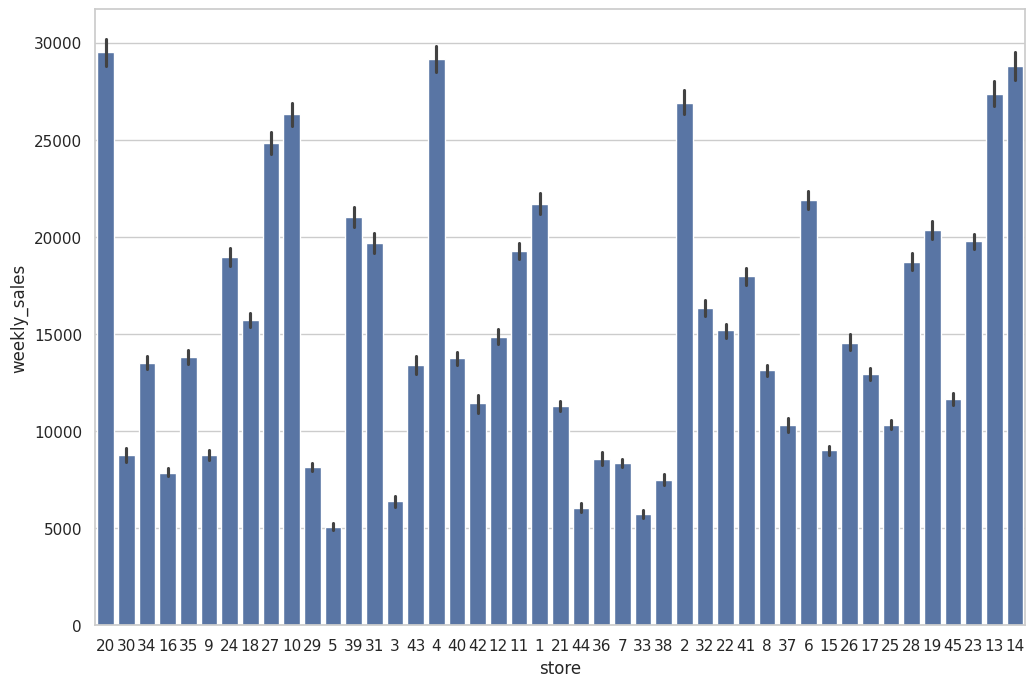

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='store',y='weekly_sales',data=final_merged_df)
plt.show()

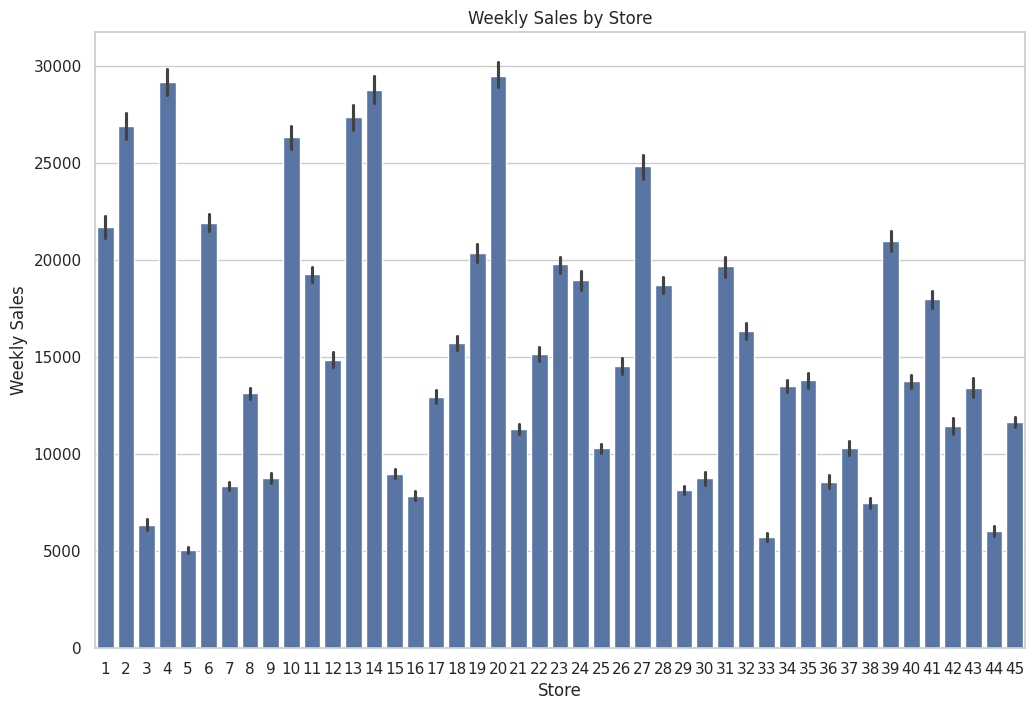

In [ ]:
# <= Numerically sorted plot of sales with weekly sales (1 to 45) =>
# Ensure 'store' is treated as an integer and sort the DataFrame by 'store'
final_merged_df['store'] = final_merged_df['store'].astype(int)
final_merged_df = final_merged_df.sort_values('store')

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(x='store', y='weekly_sales', data=final_merged_df, order=final_merged_df['store'])
plt.title('Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()

In [ ]:
# <= Ranking stores by weekly sales (combined for entire dates) =>

# Ensuring 'store' is of type integer for sorting
final_merged_df['store'] = final_merged_df['store'].astype(int)

# Aggregating weekly sales by stores
total_sales = final_merged_df.groupby('store')['weekly_sales'].sum().reset_index()

# Sorting stores by total weekly sales in descending order
total_sales = total_sales.sort_values(by='weekly_sales', ascending=False)

print(total_sales)

    store  weekly_sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08
18     19  2.066349e+08
30     31  1.996139e+08
22     23  1.987506e+08
23     24  1.940160e+08
10     11  1.939628e+08
27     28  1.892637e+08
40     41  1.813419e+08
31     32  1.668192e+08
17     18  1.551147e+08
21     22  1.470756e+08
11     12  1.442872e+08
25     26  1.434164e+08
33     34  1.382498e+08
39     40  1.378703e+08
34     35  1.315207e+08
7       8  1.299512e+08
16     17  1.277821e+08
44     45  1.123953e+08
20     21  1.081179e+08
24     25  1.010612e+08
42     43  9.056544e+07
14     15  8.913368e+07
6       7  8.159828e+07
41     42  7.956575e+07
8       9  7.778922e+07
28     29  7.714155e+07
15     16  7.425243e+07
36     37  7.420274e+07
29     30  6.271689e+07
2       3  5.758674e+07
37     38  5.515

Note:
- Stores 20, 4, 14, 13, 2 are the top 5 stores by weekly sales
- Stores 38, 36, 5, 44, 33 are the bottom 5 stores by weekly sales


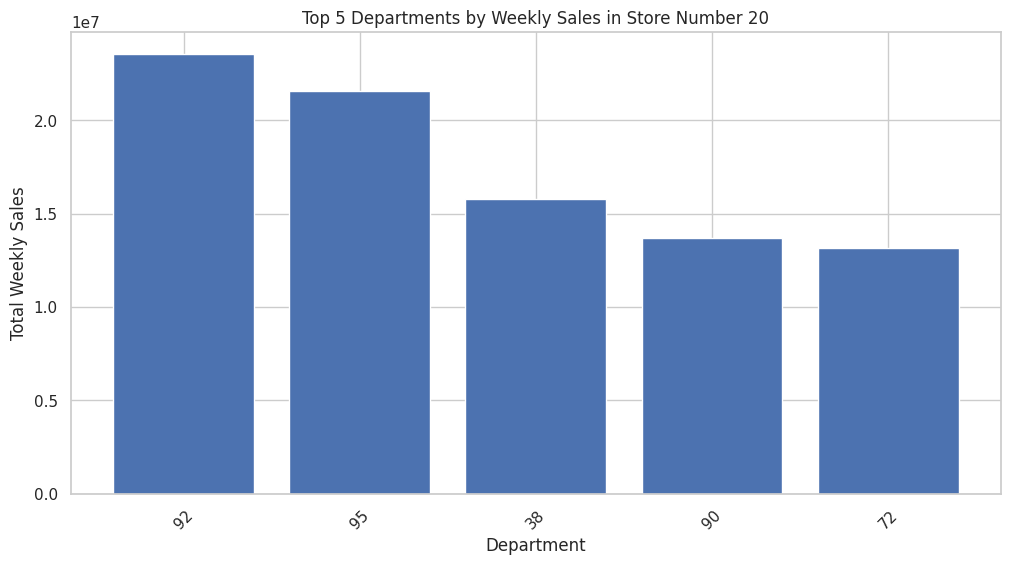

In [ ]:
# <= Top 5 departments by weekly sales of Store 20 =>

# Filtering the DataFrame for store number 20
store_20_df = final_merged_df[final_merged_df['store'] == 20]

# Aggregating weekly sales by department
department_sales = store_20_df.groupby('dept')['weekly_sales'].sum().reset_index()

# Sorting departments by total sales and get the top 5 departments
top_departments = department_sales.sort_values(by='weekly_sales', ascending=False).head(5)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_departments['dept'].astype(str), top_departments['weekly_sales'])
plt.xlabel('Department')
plt.ylabel('Total Weekly Sales')
plt.title('Top 5 Departments by Weekly Sales in Store Number 20')
plt.xticks(rotation=45)
plt.show()

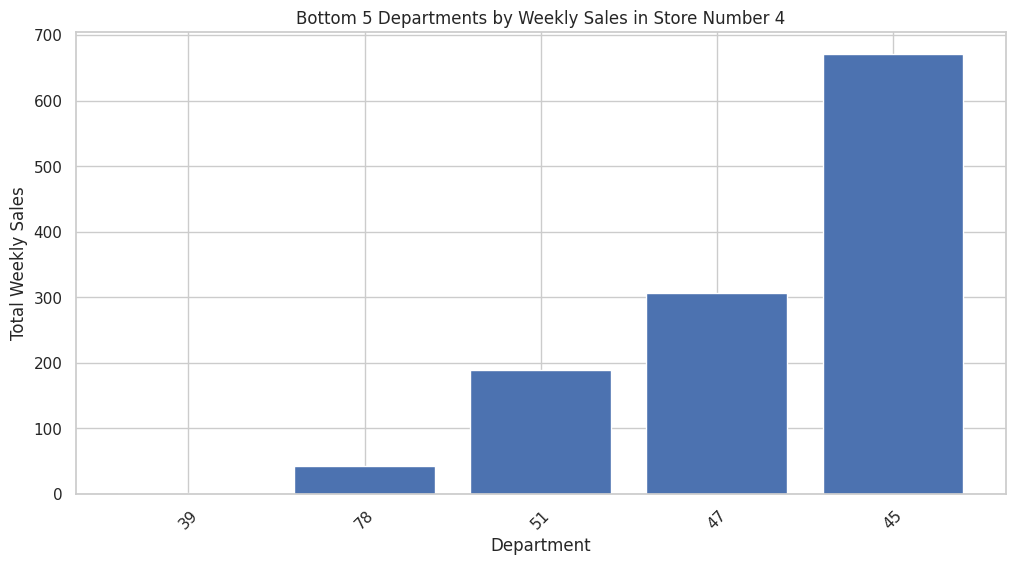

In [ ]:
# <= Bottom 5 departments by weekly sales of Store 4 =>

# Filtering the DataFrame for store number 4
store_4_df = final_merged_df[final_merged_df['store'] == 4]

# Aggregating weekly sales by department
department_sales = store_4_df.groupby('dept')['weekly_sales'].sum().reset_index()

# Sorting departments by total sales and get the bottom 5
btm_departments = department_sales.sort_values(by='weekly_sales', ascending=True).head(5)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(btm_departments['dept'].astype(str), btm_departments['weekly_sales'])
plt.xlabel('Department')
plt.ylabel('Total Weekly Sales')
plt.title('Bottom 5 Departments by Weekly Sales in Store Number 4')
plt.xticks(rotation=45)
plt.show()

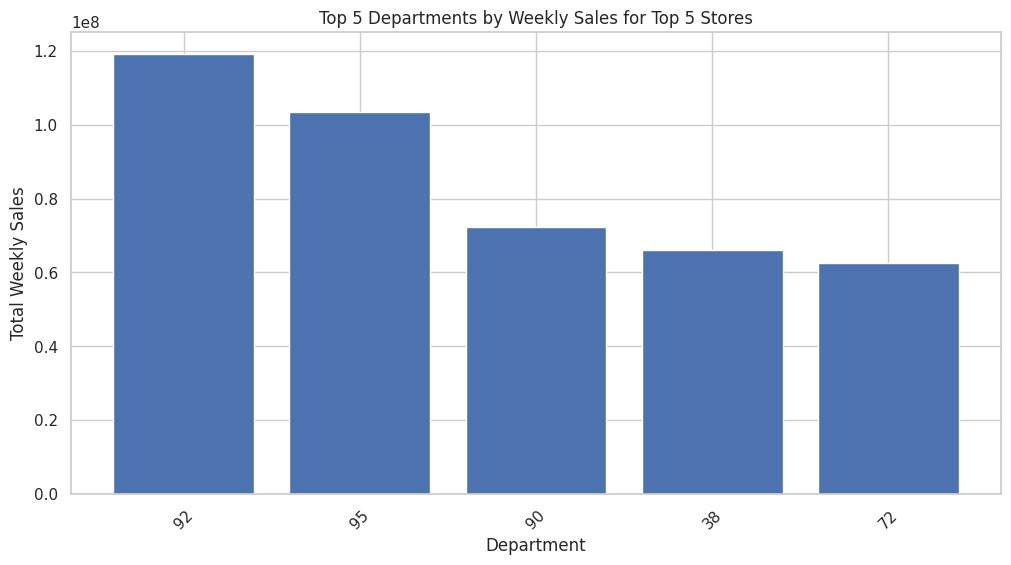

In [ ]:
# <= Top 5 departments of Top 5 stores by weekly sales (Combined for entire duration) =>

# Define the top 5 stores
top_stores = [20, 4, 14, 13, 2]

# Filter the DataFrame for the top 5 stores
top_stores_df = final_merged_df[final_merged_df['store'].isin(top_stores)]

# Aggregating weekly sales by department
department_sales = top_stores_df.groupby('dept')['weekly_sales'].sum().reset_index()

# Sorting departments by total sales and get the top 5
top_departments = department_sales.sort_values(by='weekly_sales', ascending=False).head(5)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_departments['dept'].astype(str), top_departments['weekly_sales'])
plt.xlabel('Department')
plt.ylabel('Total Weekly Sales')
plt.title('Top 5 Departments by Weekly Sales for Top 5 Stores')
plt.xticks(rotation=45)
plt.show()

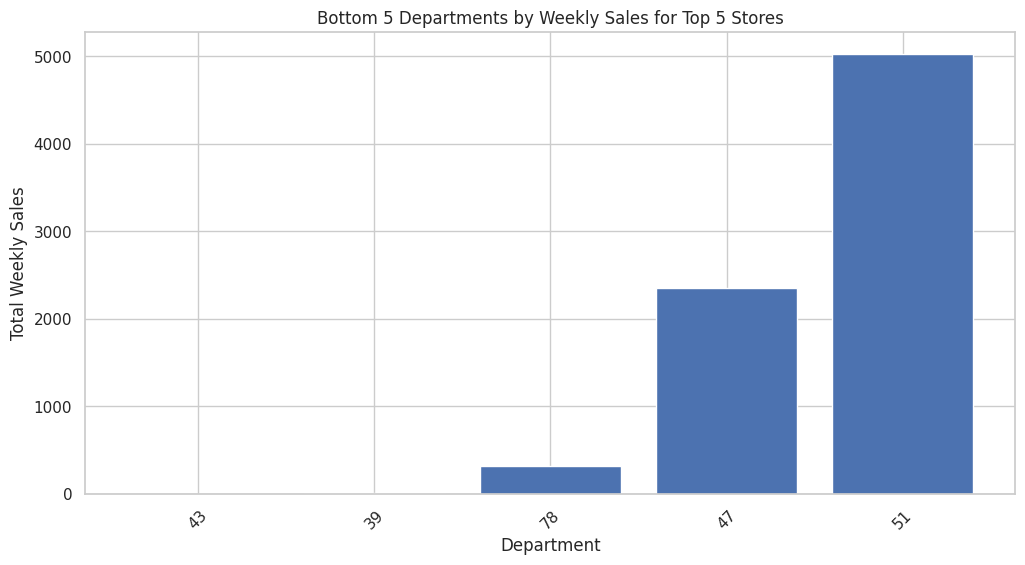

In [ ]:
# <= Bottom 5 departments of Top 5 stores by weekly sales (Combined for entire duration) =>

# Define the top 5 stores
top_stores = [20, 4, 14, 13, 2]

# Filter the DataFrame for the top 5 stores
top_stores_df = final_merged_df[final_merged_df['store'].isin(top_stores)]

# Aggregating weekly sales by department
department_sales = top_stores_df.groupby('dept')['weekly_sales'].sum().reset_index()

# Sorting departments by total sales and get the bottom 5 department
btm_departments = department_sales.sort_values(by='weekly_sales', ascending=True).head(5)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(btm_departments['dept'].astype(str), btm_departments['weekly_sales'])
plt.xlabel('Department')
plt.ylabel('Total Weekly Sales')
plt.title('Bottom 5 Departments by Weekly Sales for Top 5 Stores')
plt.xticks(rotation=45)
plt.show()

In [51]:
data = pd.read_csv('/content/drive/My Drive/Datasets/Walmart-Sales/Sales-Prediction/merged-data.csv')

In [53]:
# Convert the date column to datetime format if it's not already
data['date'] = pd.to_datetime(data['date'])

# Group by date and sum weekly sales
sales_over_time = data.groupby('date')['weekly_sales'].sum()

In [54]:
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
pd.options.plotting.backend= "plotly"

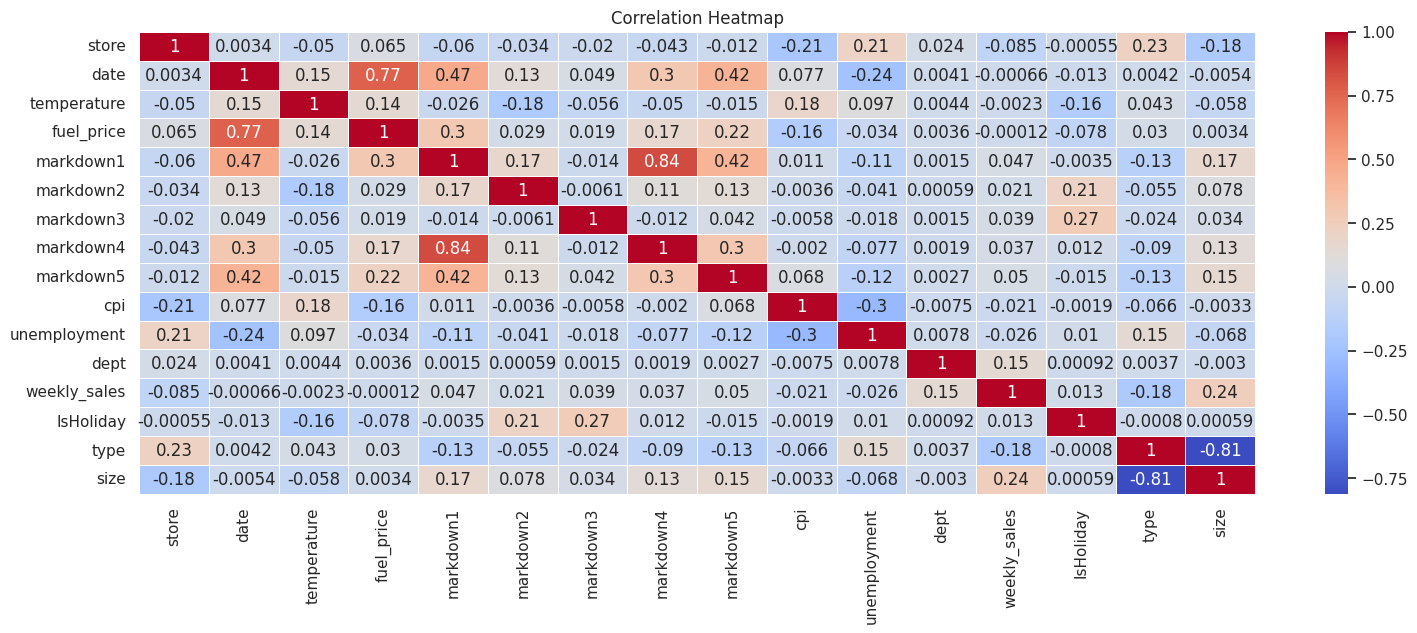

In [59]:
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

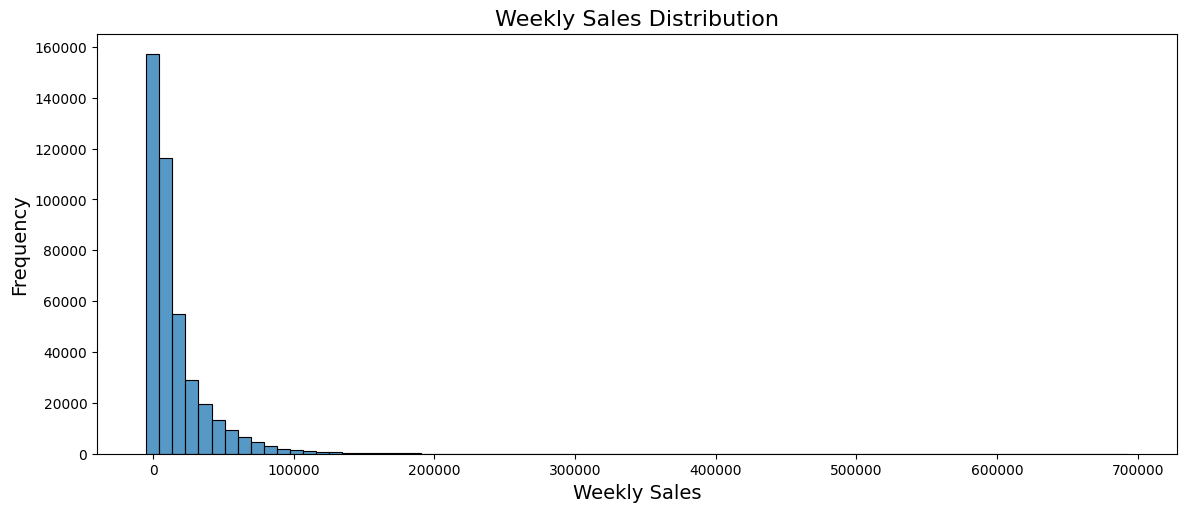

In [ ]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the histogram with 75 bins
sns.histplot(data['weekly_sales'], bins=75, kde=False)

# Set the title and labels
plt.title('Weekly Sales Distribution', fontsize=16)
plt.xlabel('Weekly Sales', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set margins
plt.gcf().subplots_adjust(left=0.05, right=0.95, bottom=0.15, top=0.85)

# Show the plot
plt.show()

In [ ]:
# average of weekly sales by department (sorted)
avg_sales_dept = data.groupby("dept")["weekly_sales"].mean().sort_values()

fig = go.Figure()

fig.add_trace(go.Bar(y=avg_sales_dept.values,
                    text=avg_sales_dept.index,
                     textposition='outside')
             )


fig.update_traces(marker_color='darkcyan',
                  marker_line_color='darkcyan',
                  marker_line_width=1.5,
                 )

fig.update_layout(title_text='Average Weekly Sales by Department',
                  xaxis_title_text="Department Number",   # xaxis label
                  xaxis_showticklabels=False,
                  yaxis_title_text="Average Sales") # yaxis label)


fig.show()

In [ ]:
# average of weekly sales by store (sorted)
avg_sales_store = data.groupby("store")["weekly_sales"].mean().sort_values()
fig = go.Figure()

fig.add_trace(go.Bar(y=avg_sales_store.values,
                    text=avg_sales_store.index,
                     textposition='outside'))


fig.update_traces(marker_color='rosybrown',
                  marker_line_color='darkmagenta',
                  marker_line_width=1.5,)

fig.update_layout(title_text='Average Weekly Sales by Store',
                  xaxis=dict(
                      title_text="Store Number",
                      showticklabels=False,
                      ticks='outside',
                      tickfont=dict(
                          family='Arial',
                          size=12,
                          color='rgb(82, 82, 82)')),
                       yaxis=dict(
                             title_text="Average Sales"))

fig.show()

In [ ]:
# checking out the sum of sales by store type
fig = go.Figure()

fig.add_trace(go.Histogram(x=data["type"],
                          histnorm="percent",
                           xbins=dict(size=0.5),marker_color='#EB89B5',opacity=0.75))

fig.update_layout(
    height=500, width=400,
    title_text="Store Types in %",
    xaxis_title_text="Type",
    yaxis_title_text="Ratio",
)

fig.show()

Note: Some department numbers are missing

- Top 5 Departments:
1. 92: Dry Grocery
2. 95: Grocery, Snacks, and Beverages
3. 90: Dairy
4. 38: Prescription Pharmacy
5. 72: Electronics

- Bottom 5 Departments:

1. 43: Toys (Unsual)
2. 39: Misc/Jewellery
3. 78: Ladieswear (Part of Fashion)
4. 47: Something in Fashion
5. 51: Sporting Goods

### Negative weekly sales

In [ ]:
final_merged_df.query("weekly_sales < 0")

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,dept,weekly_sales,IsHoliday,type,size
date,,,,,,,,,,,,,,,,
2011-04-08,1,2011-04-08,67.84,3.622,0.00,0.00,0.00,0.00,0.00,215.074394,7.68,47,-298.00,0,0,151315
2012-08-10,1,2012-08-10,85.05,3.494,11436.22,245.00,6.85,6964.26,4836.22,221.958433,6.91,6,-139.65,0,0,151315
2012-02-17,1,2012-02-17,45.32,3.510,9873.33,11062.27,9.80,8409.31,3402.66,220.425759,7.35,47,-198.00,0,0,151315
2011-07-08,1,2011-07-08,85.83,3.480,0.00,0.00,0.00,0.00,0.00,215.277175,7.96,47,-198.00,0,0,151315
2012-03-16,1,2012-03-16,64.74,3.734,4298.16,7.50,2.02,2724.65,2017.69,221.211813,7.35,47,-199.00,0,0,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-16,45,2011-12-16,39.93,3.413,4631.26,8.92,801.34,848.33,2757.82,188.797935,8.52,54,-10.64,0,1,118221
2011-02-11,45,2011-02-11,30.30,3.239,0.00,0.00,0.00,0.00,0.00,183.701613,8.55,80,-0.24,1,1,118221
2011-11-18,45,2011-11-18,51.34,3.530,4240.34,132.96,111.71,270.14,7073.00,188.198365,8.52,47,-24.00,0,1,118221


In [ ]:
# Find the average of weekly_sales by department for each store
sales_grouped_dept = final_merged_df.groupby(["store","dept"]).agg({'weekly_sales':'mean'})

# Check out negative values
sales_grouped_dept.query("weekly_sales < 0")

weekly_sales
store dept              
1     47     -116.454545
6     47      -42.023333
7     47       -9.906250
9     47       -3.070000
      80      -10.334667
10    47      -64.694444
12    47      -43.899091
14    47       -7.777917
15    37       -2.500000
16    47      -57.726667
19    19       -5.219231
20    47      -12.619333
23    47      -45.958333
24    47      -26.921429
25    48      -21.760000
      96       -1.270000
30    99       -0.641818
31    47      -20.261333
32    47       -5.250000
34    47      -78.919167
35    19       -9.788000
      47      -99.088333
36    33       -3.156667
      36      -30.000000
      71      -29.000000
      72      -27.646364
39    19       -3.238182
40    19       -5.000000
      47      -17.254286
42    41       -8.000000
      55       -7.326667
      71      -58.445000
      72      -43.211786
43    55      -11.880000
44    34       -9.880000
      71      -41.283333
45    47      -88.420000

# Modelling

In [60]:
data = pd.read_csv('/content/drive/My Drive/Datasets/Walmart-Sales/Sales-Prediction/merged-data.csv')

In [61]:
# Converting the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extracting year, month, and week from the date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['week'] = data['date'].dt.isocalendar().week

# Checking for missing values
missing_values = data.isnull().sum()

# Displaying the updated dataset with new features and missing values
data.head(), missing_values

(   store       date  temperature  fuel_price  markdown1  markdown2  markdown3  \
 0     20 2010-02-05        25.92       2.784        0.0        0.0        0.0   
 1     30 2010-02-05        39.05       2.572        0.0        0.0        0.0   
 2     30 2010-02-05        39.05       2.572        0.0        0.0        0.0   
 3     30 2010-02-05        39.05       2.572        0.0        0.0        0.0   
 4     30 2010-02-05        39.05       2.572        0.0        0.0        0.0   
 
    markdown4  markdown5         cpi  unemployment  dept  weekly_sales  \
 0        0.0        0.0  204.247194          8.19     1      46021.21   
 1        0.0        0.0  210.752605          8.32    17        198.01   
 2        0.0        0.0  210.752605          8.32    16        974.31   
 3        0.0        0.0  210.752605          8.32    14       1134.75   
 4        0.0        0.0  210.752605          8.32    13      12059.20   
 
    IsHoliday  type    size  year  month  week  
 0         

### Linear Models

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the features for the model (excluding the target variable 'weekly_sales' and 'date')
features = data.drop(columns=['weekly_sales', 'date'])

# Target variable
target = data['weekly_sales']

In [63]:
features

,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,dept,IsHoliday,type,size,year,month,week
0,20,25.92,2.784,0.00,0.00,0.00,0.00,0.00,204.247194,8.19,1,0,0,203742,2010,2,5
1,30,39.05,2.572,0.00,0.00,0.00,0.00,0.00,210.752605,8.32,17,0,2,42988,2010,2,5
2,30,39.05,2.572,0.00,0.00,0.00,0.00,0.00,210.752605,8.32,16,0,2,42988,2010,2,5
3,30,39.05,2.572,0.00,0.00,0.00,0.00,0.00,210.752605,8.32,14,0,2,42988,2010,2,5
4,30,39.05,2.572,0.00,0.00,0.00,0.00,0.00,210.752605,8.32,13,0,2,42988,2010,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,38,65.95,4.301,148.32,6.73,3.05,0.00,344.78,131.193097,10.20,95,0,2,39690,2012,10,43
421566,38,65.95,4.301,148.32,6.73,3.05,0.00,344.78,131.193097,10.20,94,0,2,39690,2012,10,43
421567,38,65.95,4.301,148.32,6.73,3.05,0.00,344.78,131.193097,10.20,93,0,2,39690,2012,10,43
421568,28,65.95,4.301,6490.13,90.02,0.00,1750.84,1684.36,131.193097,10.20,33,0,0,206302,2012,10,43


In [64]:
target

,weekly_sales
0,46021.21
1,198.01
2,974.31
3,1134.75
4,12059.20
...,...
421565,41940.71
421566,22348.91
421567,18739.49
421568,8846.10


In [65]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
# Making predictions on test set
y_pred = model.predict(X_test)

In [67]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

470345208.57561773
0.08780915801817535


### Lasso/Ridge Models

In [68]:
# Trying with other algorithms

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Feature Engineering: Adding interaction terms using PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Apply scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Regularization: Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_pred = ridge_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

In [69]:
print(ridge_r2 * 100)

11.581299737717131


In [70]:
# Regularization: Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
lasso_pred = lasso_model.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.245e+13, tolerance: 1.740e+10



In [72]:
print(lasso_r2 * 100)

11.536166550640758


## Tree Models

In [71]:
import time

### RBF: n_est = 50

In [73]:
# Advanced Model: Random Forest Regressor (n_estimators=50)
# Start time
start_time = time.time()
rf_model_1 = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model_1.fit(X_train, y_train)
rf_pred_1 = rf_model_1.predict(X_test)
rf_mse_1 = mean_squared_error(y_test, rf_pred_1)
rf_r2_1 = r2_score(y_test, rf_pred_1)
# End time
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)

Execution Time:  4.296575252215067


### RBF: n_est = 50, md = 100

In [74]:
# Advanced Model: Random Forest Regressor (n_estimators=50, max_depth=100)
# Start time
start_time = time.time()
rf_model_1_100 = RandomForestRegressor(n_estimators=50, max_depth=100, random_state=42)
rf_model_1_100.fit(X_train, y_train)
rf_pred_1_100  = rf_model_1_100.predict(X_test)
rf_mse_1_100 = mean_squared_error(y_test, rf_pred_1_100)
rf_r2_1_100 = r2_score(y_test, rf_pred_1_100)
# End time
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)

Execution Time:  4.283710086345673


### RBF: n_est = 100

In [78]:
# Advanced Model: Random Forest Regressor (n_estimators=100)
# Start time
start_time = time.time()
rf_model_2 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model_2.fit(X_train, y_train)
rf_pred_2 = rf_model_2.predict(X_test)
rf_mse_2 = mean_squared_error(y_test, rf_pred_2)
rf_r2_2 = r2_score(y_test, rf_pred_2)
# End time
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)

Execution Time:  3.7589823325475056


### RBF: n_est = 100, md=100

In [76]:
# Advanced Model: Random Forest Regressor (n_estimators=100)
# Start time
start_time = time.time()
rf_model_2_100 = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)
rf_model_2_100.fit(X_train, y_train)
rf_pred_2_100 = rf_model_2_100.predict(X_test)
rf_mse_2_100 = mean_squared_error(y_test, rf_pred_2_100)
rf_r2_2_100 = r2_score(y_test, rf_pred_2_100)
# End time
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)

Execution Time:  8.296161218484242


## Gradient Boosting

### GB: n_est = 50

In [79]:
# Advanced Model: Gradient Boosting Regressor
start_time = time.time()
gb_model_1 = GradientBoostingRegressor(n_estimators=50, random_state=42)
gb_model_1.fit(X_train, y_train)
gb_pred_1 = gb_model_1.predict(X_test)
gb_mse_1 = mean_squared_error(y_test, gb_pred_1)
gb_r2_1 = r2_score(y_test, gb_pred_1)
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)

Execution Time:  0.7754300355911254


### GB: n_est = 100

In [80]:
# Advanced Model: Gradient Boosting Regressor
start_time = time.time()
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred_2 = gb_model.predict(X_test)
gb_mse_2 = mean_squared_error(y_test, gb_pred_2)
gb_r2_2 = r2_score(y_test, gb_pred_2)
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)

Execution Time:  1.5940816283226014


### GB: n_est = 200

In [81]:
# Advanced Model: Gradient Boosting Regressor
start_time = time.time()
gb_model = GradientBoostingRegressor(n_estimators=200, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred_3 = gb_model.predict(X_test)
gb_mse_3 = mean_squared_error(y_test, gb_pred_3)
gb_r2_3 = r2_score(y_test, gb_pred_3)
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print(execution_time)

3.184914735953013


## XGB Regressor

In [83]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
xgb_pred = xgbr.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

In [84]:
xgboost_accuracy = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgboost_accuracy)

XGBoost Regressor Accuracy -  94.32889703470117


In [85]:
xgbr1 = XGBRegressor(n_estimators=200)
xgbr1.fit(X_train, y_train)
xgb_pred_1 = xgbr1.predict(X_test)
xgb_mse_1 = mean_squared_error(y_test, xgb_pred_1)
xgb_r2_1 = r2_score(y_test, xgb_pred_1)

In [86]:
xgboost_accuracy = xgbr1.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgboost_accuracy)

XGBoost Regressor Accuracy -  95.88031656895174


# Compiled Results

In [87]:
# Compile the results with MSE and R^2
results = {
    "Model": ["Ridge Regression", "Lasso Regression", "Random Forest", "Random Forest" ,"Random Forest", "Random Forest", "Gradient Boosting", "Gradient Boosting", "Gradient Boosting", "XGB Regressor", "XGB Regressor"],
    "MSE": [ridge_mse, lasso_mse, rf_mse_1, rf_mse_1_100, rf_mse_2, rf_mse_2_100, gb_mse_1, gb_mse_2, gb_mse_3, xgb_mse, xgb_mse_1],
    "R² Score": [ridge_r2, lasso_r2, rf_r2_1, rf_r2_1_100, rf_r2_2, rf_r2_2_100, gb_r2_1, gb_r2_2, gb_r2_3, xgb_r2, xgb_r2_1]
}

results_df = pd.DataFrame(results)
results_df

,Model,MSE,R² Score
0,Ridge Regression,4.559058e+08,0.115813
1,Lasso Regression,4.561385e+08,0.115362
2,Random Forest,1.306101e+07,0.974669
3,Random Forest,1.306101e+07,0.974669
4,Random Forest,6.115065e+07,0.881404
5,Random Forest,1.274589e+07,0.975281
6,Gradient Boosting,1.793905e+08,0.652089
7,Gradient Boosting,1.321454e+08,0.743716
8,Gradient Boosting,1.017133e+08,0.802736
9,XGB Regressor,2.924143e+07,0.943289


# Feature Engineering

In [88]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.5 MB/s eta 0:00:00


In [89]:
import shap
import matplotlib.pyplot as plt
explainer_gb = shap.TreeExplainer(gb_model_1)
shap_values_gb = explainer_gb.shap_values(X_test)

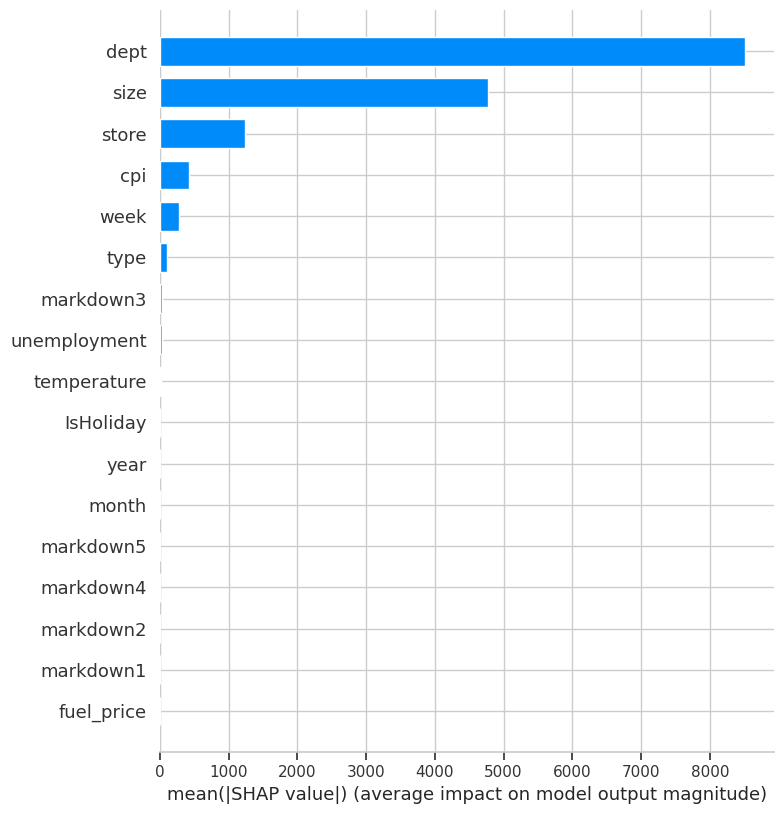

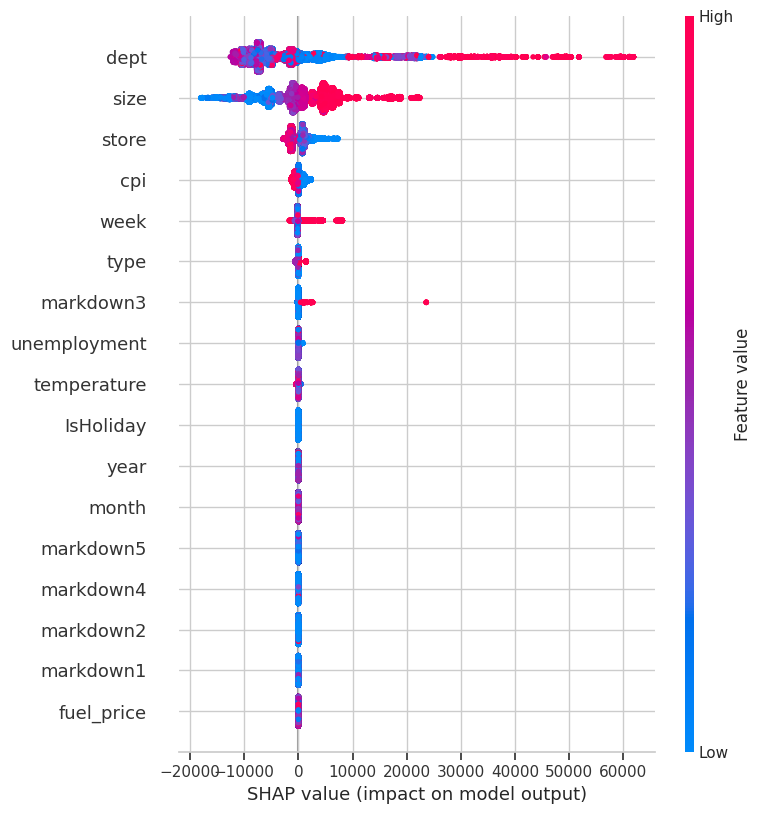

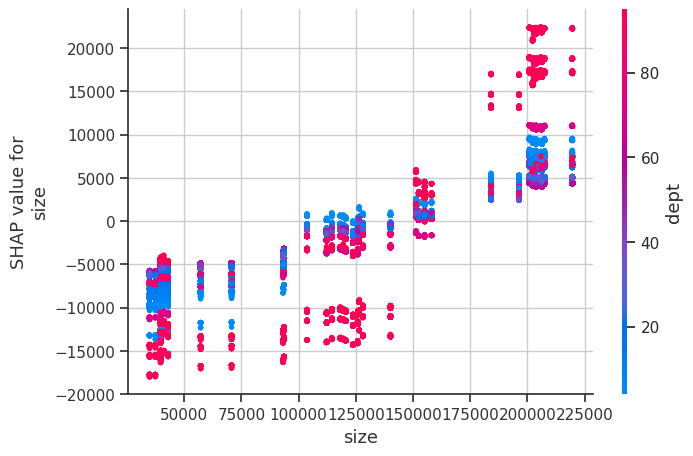

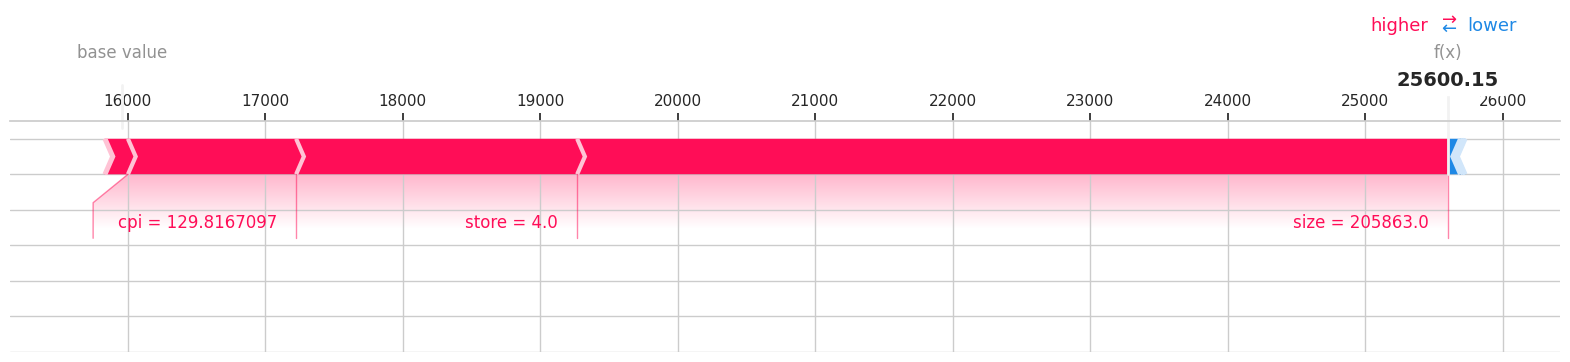

In [90]:
# Visualize the summary plot to understand feature importance and effects
shap.summary_plot(shap_values_gb, X_test, plot_type="bar")  # Bar plot for feature importance

# Detailed summary plot (beeswarm)
shap.summary_plot(shap_values_gb, X_test)

shap.dependence_plot("size", shap_values_gb, X_test)

shap.force_plot(explainer_gb.expected_value, shap_values_gb[0,:], X_test.iloc[0,:], matplotlib=True)

plt.show()

### Removing Low Value Feature

In [91]:
# Example of removing low-importance features
X_train = X_train.drop(['month', 'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5', 'year'], axis=1)
X_test = X_test.drop(['month', 'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5', 'year'], axis=1)

In [92]:
X_train

,store,cpi,unemployment,dept,IsHoliday,type,size,week
138466,33,127.087677,9.27,87,1,0,39690,52
289214,26,136.588387,7.60,21,0,0,152513,51
52351,42,126.136065,9.52,1,0,2,39690,22
203504,34,129.049032,10.58,29,0,0,158114,22
233606,34,129.201581,10.64,30,0,0,158114,32
...,...,...,...,...,...,...,...,...
259178,16,195.026101,6.23,1,0,1,57197,41
365838,14,191.064610,8.57,6,0,0,200898,25
131932,1,211.405312,7.84,45,0,0,151315,50
146867,43,203.831516,10.40,32,0,2,41062,3


In [93]:
X_test

,store,cpi,unemployment,dept,IsHoliday,type,size,week
272342,4,129.816710,5.14,13,0,0,205863,45
176581,30,214.488691,7.93,42,0,2,42988,13
354212,32,197.588605,8.09,11,0,0,203007,21
281444,3,222.158952,7.20,26,0,1,37392,48
124208,23,132.836933,5.29,14,1,1,114533,47
...,...,...,...,...,...,...,...,...
415987,13,131.149968,5.62,20,0,0,219622,42
193068,23,134.514367,4.78,96,0,1,114533,18
346600,4,131.136000,4.31,85,0,0,205863,18
380513,10,130.719581,7.17,34,0,1,126512,30


## Modelling

In [94]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [95]:
# Advanced Model: Gradient Boosting Regressor
import time
start_time = time.time()
gb_model_1 = GradientBoostingRegressor(n_estimators=50, random_state=42)
gb_model_1.fit(X_train, y_train)
gb_pred_1 = gb_model_1.predict(X_test)
gb_mse_1 = mean_squared_error(y_test, gb_pred_1)
gb_r2_1 = r2_score(y_test, gb_pred_1)
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)

Execution Time:  0.8518100182215372


In [96]:
print(gb_r2_1)
print(gb_mse_1)

0.6485625012424316
181208729.62865743


In [97]:
start_time = time.time()
gb_model_2 = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model_2.fit(X_train, y_train)
gb_pred_2 = gb_model_2.predict(X_test)
gb_mse_2 = mean_squared_error(y_test, gb_pred_2)
gb_r2_2 = r2_score(y_test, gb_pred_2)
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)

1.258328338464101


In [98]:
print(gb_r2_2)
print(gb_mse_2)

0.7422041591026212
132925077.710022


In [99]:
start_time = time.time()
gb_model_3 = GradientBoostingRegressor(n_estimators=200, random_state=42)
gb_model_3.fit(X_train, y_train)
gb_pred_3 = gb_model_3.predict(X_test)
gb_mse_3 = mean_squared_error(y_test, gb_pred_3)
gb_r2_3 = r2_score(y_test, gb_pred_3)
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)

Execution Time:  2.987750244140625


In [100]:
print(gb_r2_3)
print(gb_mse_3)

0.8031918357739974
101478520.49374995


## LightGBM

In [102]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize and fit the LightGBM regressor model
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1)
lgb_regressor.fit(X_train, y_train)

# Make predictions
lgb_predictions = lgb_regressor.predict(X_test)

# Calculate R² value using the score method
r2_value_score_method = lgb_regressor.score(X_test, y_test)

# Calculate R² value using the r2_score function
r2_value_function = r2_score(y_test, lgb_predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, lgb_predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, lgb_predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5

print(f"R² value using score method: {r2_value_score_method}")
print(f"R² value using r2_score function: {r2_value_function}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 337256, number of used features: 8
[LightGBM] [Info] Start training from score 15960.785333
R² value using score method: 0.9106604190737999
R² value using r2_score function: 0.9106604190737999
Mean Absolute Error (MAE): 4082.571047280473
Mean Squared Error (MSE): 46065408.56461383
Root Mean Squared Error (RMSE): 6787.150253575784


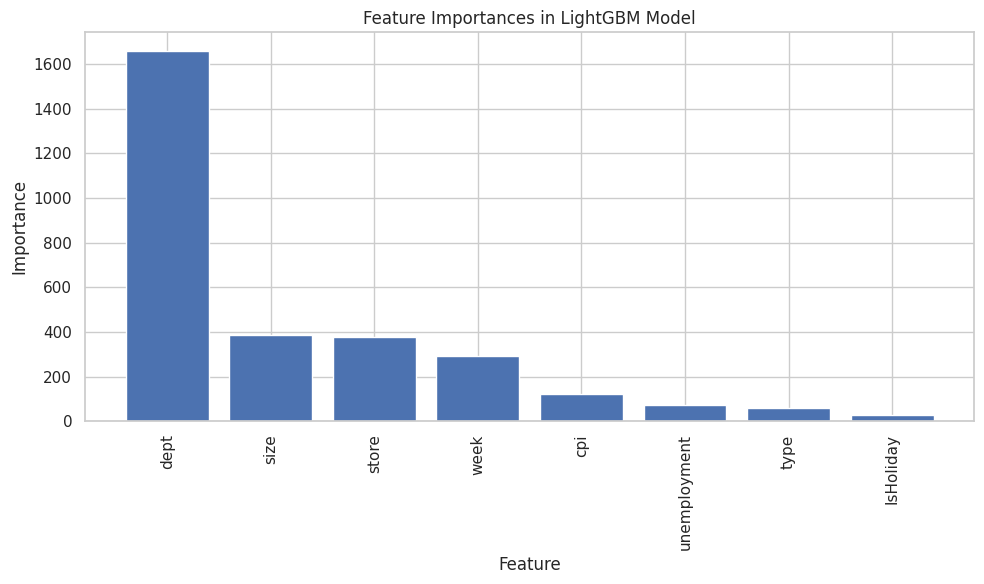

In [103]:
# Get feature importances
feature_importances = lgb_regressor.feature_importances_
features = X_train.columns

# Sort features by importance
indices = np.argsort(feature_importances)[::-1]
sorted_features = features[indices]
sorted_importances = feature_importances[indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), sorted_importances, align='center')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.title('Feature Importances in LightGBM Model')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Forecasting

## ARIMA

In [104]:
from statsmodels.tsa.arima.model import ARIMA

In [105]:
data['date'] = pd.to_datetime(data['date'])

# Aggregate the data by week
weekly_sales = data.groupby('date')['weekly_sales'].sum().reset_index()

# Set the date as the index
weekly_sales.set_index('date', inplace=True)

In [106]:
# Define the training period
train = weekly_sales.iloc[:-52]  # Use all but the last year for training
test = weekly_sales.iloc[-52:]   # Use the last year for testing

In [107]:
# Fit the ARIMA model
model = ARIMA(train, order=(5,1,0))  # (p,d,q) parameters can be tuned
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



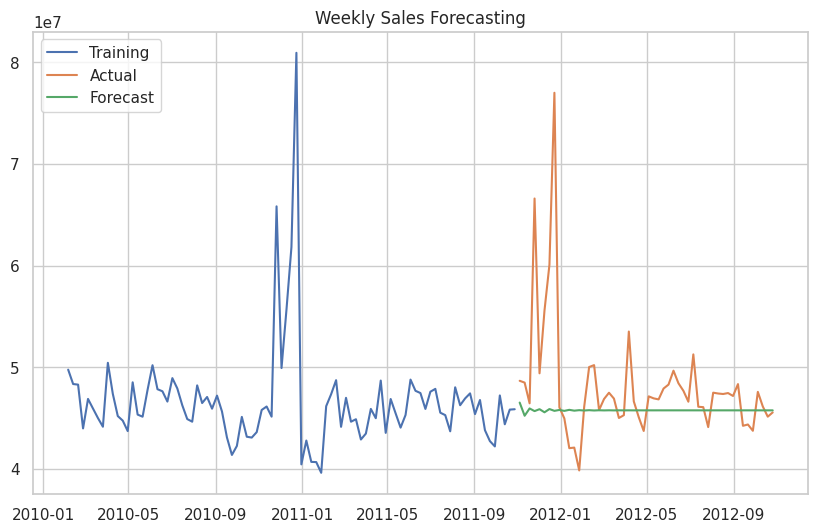

In [108]:
# Forecast for the test period
forecast = model_fit.forecast(steps=len(test))

# Plot the forecast against the actual values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend(loc='upper left')
plt.title('Weekly Sales Forecasting')
plt.show()

### Tuning Model

In [109]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np

data['date'] = pd.to_datetime(data['date'])

# Aggregate the data by week
weekly_sales = data.groupby('date')['weekly_sales'].sum().reset_index()

# Set the date as the index
weekly_sales.set_index('date', inplace=True)

# Define the training period
train = weekly_sales.iloc[:-52]  # Use all but the last year for training
test = weekly_sales.iloc[-52:]   # Use the last year for testing

# Grid search for ARIMA parameters
best_aic = np.inf
best_order = None
best_model = None

# Define a range of p, d, q values to try
p_values = range(0, 6)
d_values = range(0, 2)
q_values = range(0, 6)

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(train, order=(p, d, q))
                model_fit = model.fit()
                aic = model_fit.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
                    best_model = model_fit
            except Exception as e:
                continue

print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")

# Use the best model for predictions
predictions = best_model.forecast(steps=len(test))

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print(f"RMSE for best ARIMA model: {rmse}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information w

Best ARIMA order: (0, 1, 5) with AIC: 3050.9341382069338
RMSE for best ARIMA model: 6263405.37778519


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



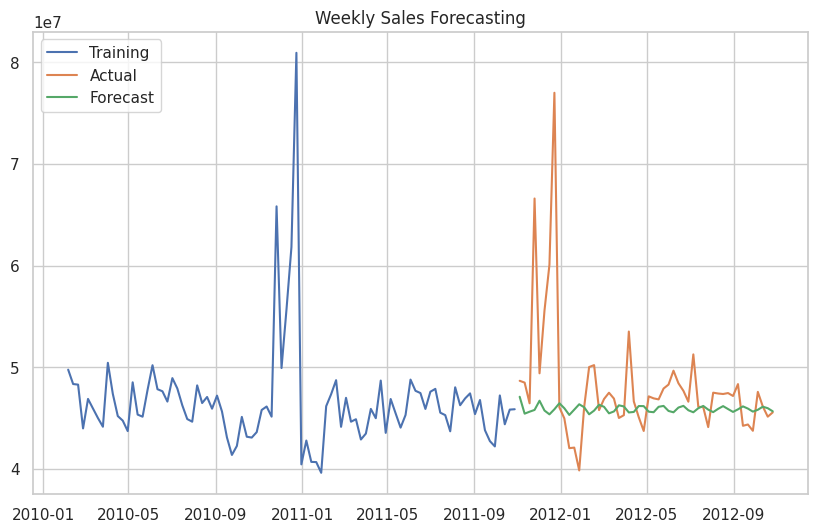

In [110]:
# Forecast for the test period
forecast = model_fit.forecast(steps=len(test))

# Plot the forecast against the actual values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend(loc='upper left')
plt.title('Weekly Sales Forecasting')
plt.show()

## SARIMAX

In [111]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

data['date'] = pd.to_datetime(data['date'])

# Aggregate the data by week
weekly_sales = data.groupby('date')['weekly_sales'].sum().reset_index()

# Set the date as the index
weekly_sales.set_index('date', inplace=True)

# Define the training period
train = weekly_sales.iloc[:-52]
test = weekly_sales.iloc[-52:]

# Grid search for ARIMA/SARIMA parameters
best_aic = np.inf
best_order = None
best_seasonal_order = None
best_model = None

# Define a range of p, d, q values to try
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
S = 52  # Assuming weekly seasonality

for p in tqdm(p_values):
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        try:
                            model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, S), enforce_stationarity=False, enforce_invertibility=False)
                            model_fit = model.fit(disp=False)
                            aic = model_fit.aic
                            if aic < best_aic:
                                best_aic = aic
                                best_order = (p, d, q)
                                best_seasonal_order = (P, D, Q, S)
                                best_model = model_fit
                        except Exception as e:
                            continue

print(f"Best SARIMA order: {best_order} with seasonal order: {best_seasonal_order} and AIC: {best_aic}")

# Walk-forward validation
predictions = []
for i in range(len(test)):
    train_data = weekly_sales.iloc[:-(52-i)]
    model = SARIMAX(train_data, order=best_order, seasonal_order=best_seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=1)
    predictions.append(forecast.values[0])

# Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print(f"RMSE for best SARIMA model: {rmse}")


  0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.10/dist-

Best SARIMA order: (0, 0, 0) with seasonal order: (0, 1, 1, 52) and AIC: 4.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/s

RMSE for best SARIMA model: 2128341.295087557


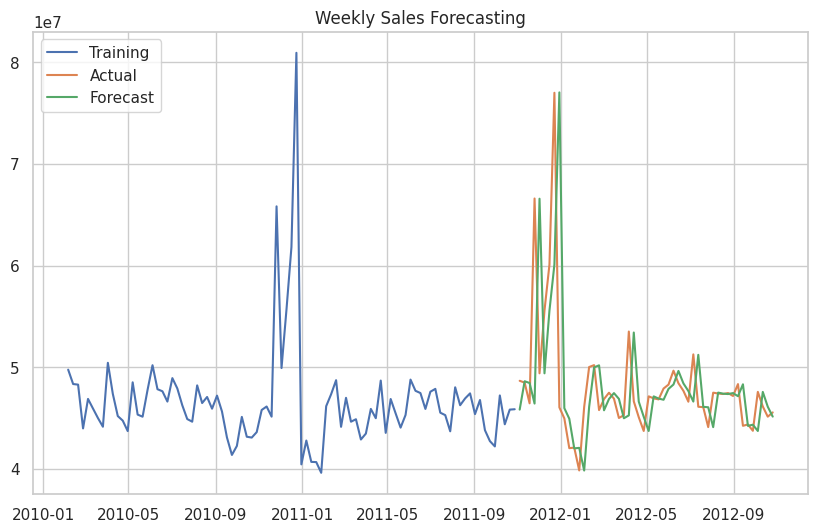

In [112]:
# Forecast for the test period
forecast = model_fit.forecast(steps=len(test))

# Plot the forecast against the actual values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend(loc='upper left')
plt.title('Weekly Sales Forecasting')
plt.show()

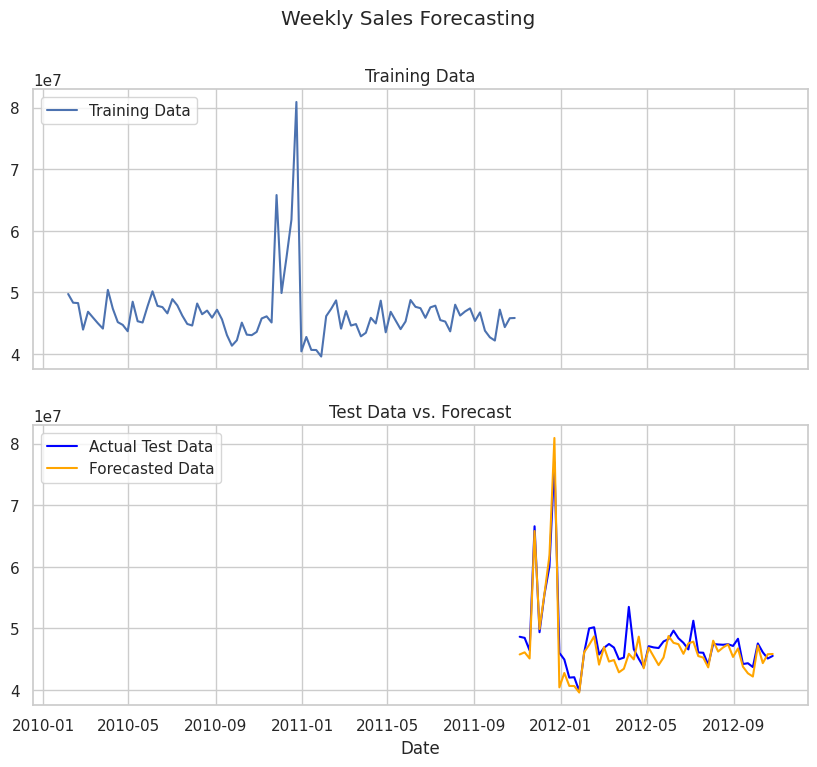

In [113]:
import matplotlib.pyplot as plt

# Forecast for the test period
forecast = best_model.forecast(steps=len(test))

# Plot the training and test data with forecasts in two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Upper subplot for training data
ax1.plot(train.index, train, label='Training Data')
ax1.set_title('Training Data')
ax1.legend(loc='upper left')

# Lower subplot for test data and forecasts
ax2.plot(test.index, test, label='Actual Test Data', color='blue')
ax2.plot(test.index, forecast, label='Forecasted Data', color='orange')
ax2.set_title('Test Data vs. Forecast')
ax2.legend(loc='upper left')

# Set common x-axis label and overall title
fig.suptitle('Weekly Sales Forecasting')
plt.xlabel('Date')
plt.show()

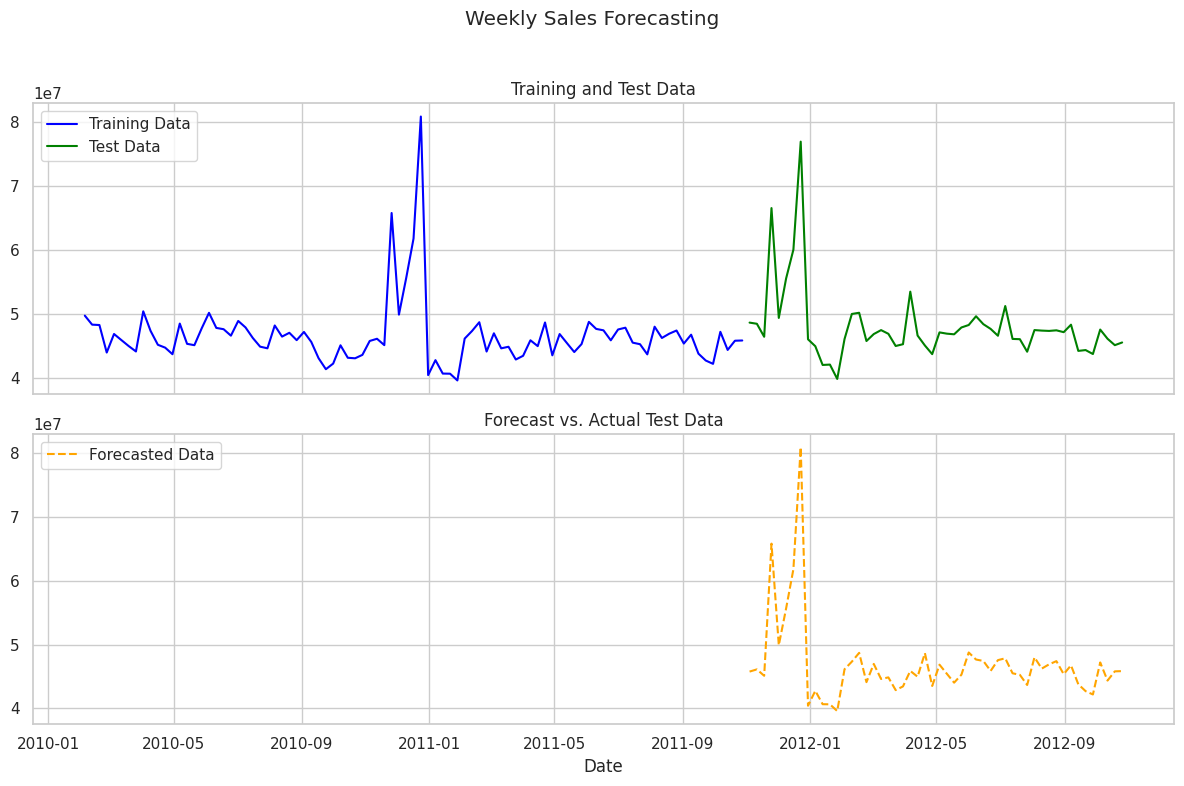

In [114]:
# Forecast for the test period
forecast = best_model.forecast(steps=len(test))

# Plot the training and test data in the upper plot, and forecast vs. actual test data in the lower plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Upper subplot for training and test data
ax1.plot(train.index, train, label='Training Data', color='blue')
ax1.plot(test.index, test, label='Test Data', color='green')
ax1.set_title('Training and Test Data')
ax1.legend(loc='upper left')

# Lower subplot for forecast vs. actual test data
# ax2.plot(test.index, test, label='Actual Test Data', color='green')
ax2.plot(test.index, forecast, label='Forecasted Data', color='orange', linestyle='--')
ax2.set_title('Forecast vs. Actual Test Data')
ax2.legend(loc='upper left')

# Set common labels
fig.suptitle('Weekly Sales Forecasting')
plt.xlabel('Date')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(test, predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))

# Calculate MAPE
mape = np.mean(np.abs((test.values - predictions) / test.values)) * 100

# Calculate Accuracy as a Percentage (1 - MAPE/100)
accuracy_percentage = 100 - mape

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Accuracy: {accuracy_percentage}%")

Mean Absolute Error (MAE): 1597388.9843533235
Root Mean Squared Error (RMSE): 2128341.295087557
Mean Absolute Percentage Error (MAPE): 10.139488649093506%
Accuracy: 89.86051135090649%


# Other Models & Results

## Walmart Ecommerce Datatset

In [ ]:
# loading all datasets
df_ecomm = pd.read_csv('/content/drive/My Drive/Datasets/Walmart-Sales/Ecomm-prediction/walmart.csv')
df_ecomm.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df_ecomm.shape

(550068, 10)

In [ ]:
df_ecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df_ecomm['Product_Category'].nunique()

20

In [ ]:
df_features.shape

(8190, 12)

In [ ]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         8190 non-null   int64  
 1   date          8190 non-null   object 
 2   temperature   8190 non-null   float64
 3   fuel_price    8190 non-null   float64
 4   markdown1     4032 non-null   float64
 5   markdown2     2921 non-null   float64
 6   markdown3     3613 non-null   float64
 7   markdown4     3464 non-null   float64
 8   markdown5     4050 non-null   float64
 9   cpi           7605 non-null   float64
 10  unemployment  7605 non-null   float64
 11  isholiday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


<ipython-input-53-6e16a605d9f8>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-53-6e16a605d9f8>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-53-6e16a605d9f8>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-53-6e16a605d9f8>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-53-6e16a605d9f8>:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

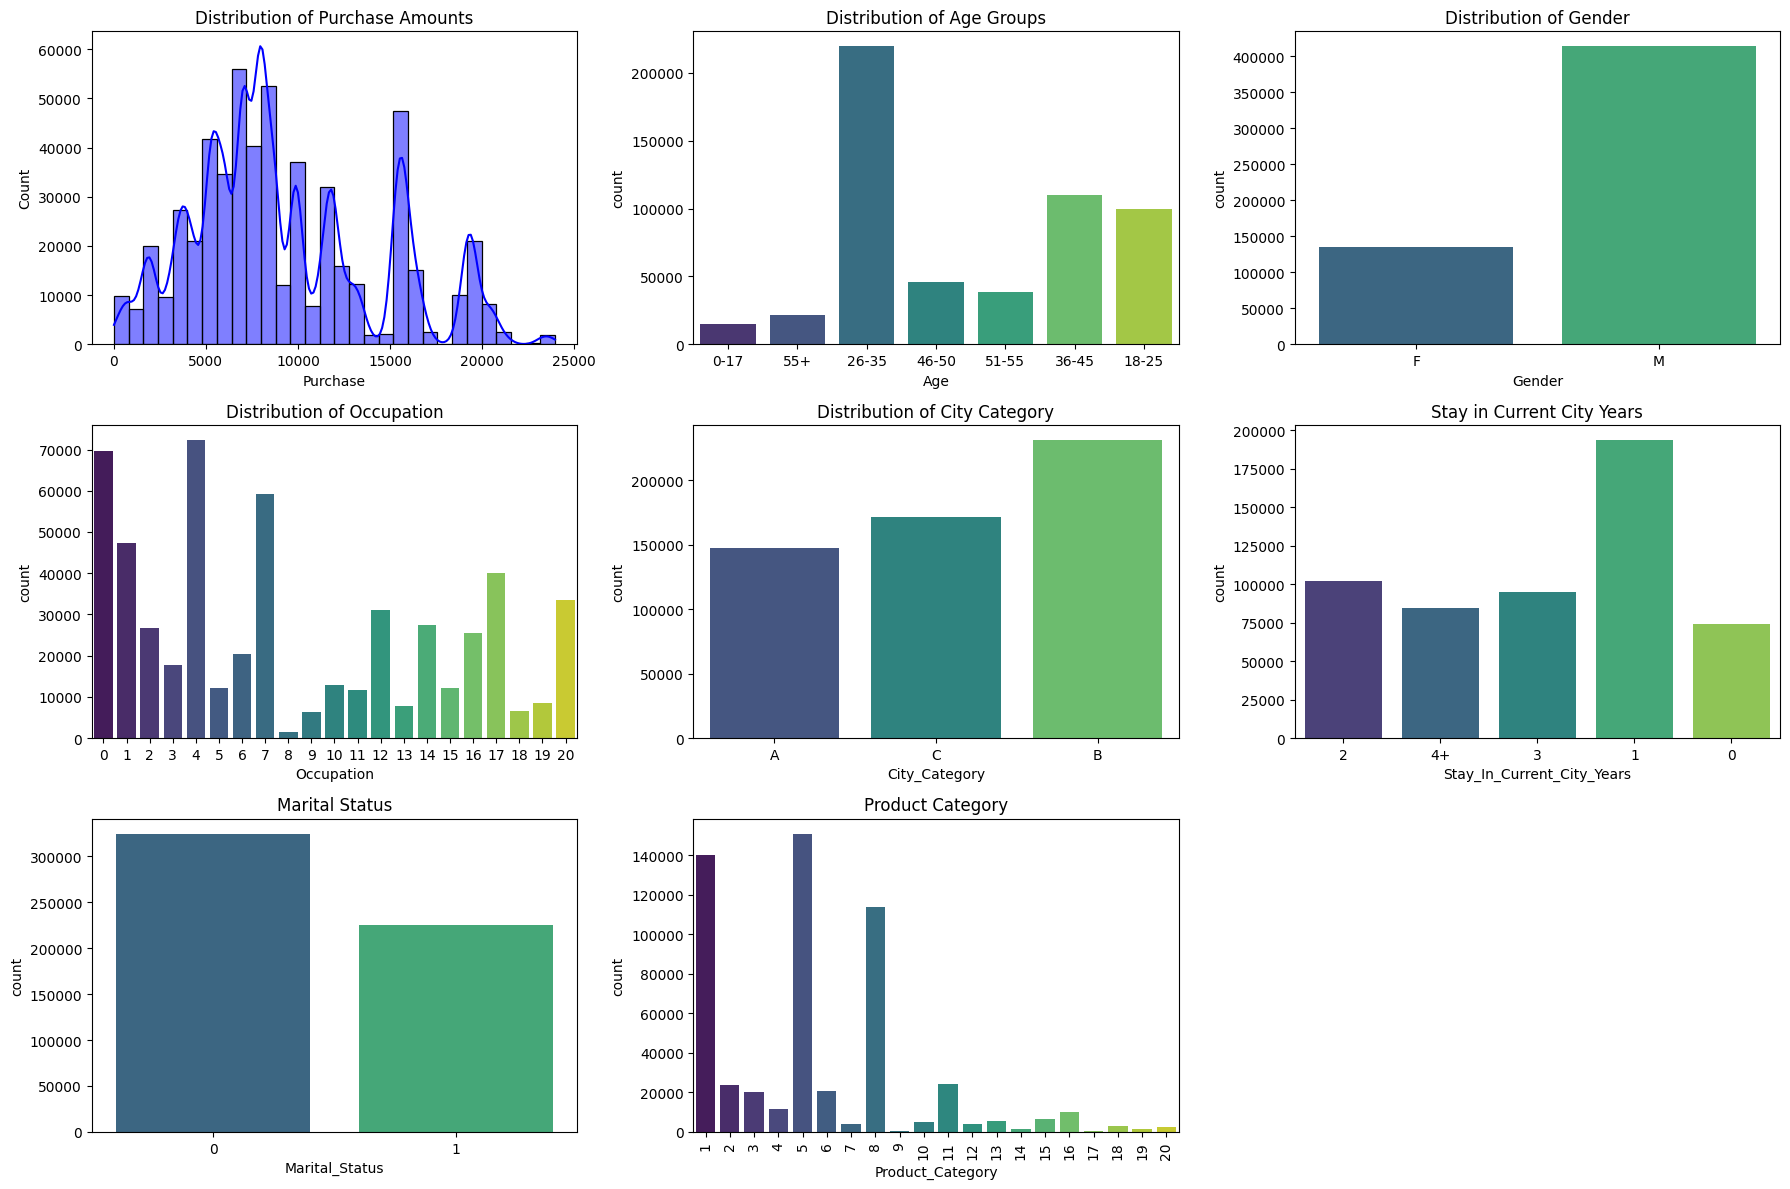

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(18, 12))

# Distribution of Purchase
plt.subplot(3, 3, 1)
sns.histplot(df_ecomm['Purchase'], kde=True, bins=30, color='blue')
plt.title('Distribution of Purchase Amounts')

# Distribution of Age
plt.subplot(3, 3, 2)
sns.countplot(x='Age', data=df_ecomm, palette='viridis')
plt.title('Distribution of Age Groups')

# Distribution of Gender
plt.subplot(3, 3, 3)
sns.countplot(x='Gender', data=df_ecomm, palette='viridis')
plt.title('Distribution of Gender')

# Distribution of Occupation
plt.subplot(3, 3, 4)
sns.countplot(x='Occupation', data=df_ecomm, palette='viridis')
plt.title('Distribution of Occupation')

# Distribution of City_Category
plt.subplot(3, 3, 5)
sns.countplot(x='City_Category', data=df_ecomm, palette='viridis')
plt.title('Distribution of City Category')

# Distribution of Stay_In_Current_City_Years
plt.subplot(3, 3, 6)
sns.countplot(x='Stay_In_Current_City_Years', data=df_ecomm, palette='viridis')
plt.title('Stay in Current City Years')

# Distribution of Marital_Status
plt.subplot(3, 3, 7)
sns.countplot(x='Marital_Status', data=df_ecomm, palette='viridis')
plt.title('Marital Status')

# Distribution of Product_Category
plt.subplot(3, 3, 8)
sns.countplot(x='Product_Category', data=df_ecomm, palette='viridis')
plt.title('Product Category')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
